<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Price Predictions

### I. Problem Statement

Company X is a newly launched Customer-to-Customer marketplace that aims to empower individuals to be able to buy/sell property without the hassle and high commission rates of real estate agents. One feature the company wants to provide is a pricing mechanism to help sellers determine the price they should market their property at and what they can do to get a better price for their home. 

I was hired to create a model that would be able to predict price based on local housing data; to help potential sellers determine market price for their particular house based on their features, and if possible, create a list of recommendations that the user can improve on to increase their house price.

### II. Importing Libraries and Reading in Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.dummy import DummyRegressor

In [2]:
train = pd.read_csv("../datasets/train.csv")
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

Consulting the following [document](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) to get the dataframe's dictionary, I was able to categorize all 81 columns into 2 variables, categorical and numerical data. 

In [3]:
categorical = ["Id","PID","MS SubClass","MS Zoning","Street","Alley","Lot Shape","Land Contour",
               "Utilities","Lot Config","Land Slope","Neighborhood","Condition 1","Condition 2",
               "Bldg Type","House Style","Roof Style","Roof Matl",
               "Exterior 1st","Exterior 2nd","Mas Vnr Type","Exter Qual","Exter Cond","Foundation",
               "Bsmt Qual","Bsmt Cond","Bsmt Exposure","BsmtFin Type 1","BsmtFin Type 2",
               "Heating","Heating QC","Central Air","Electrical","Kitchen Qual","Functional",
               "Fireplace Qu","Garage Type","Garage Finish","Garage Qual","Garage Cond",
               "Paved Drive","Pool QC","Fence","Misc Feature","Misc Val","Sale Type"]

numerical = ["Lot Frontage","Lot Area","Overall Qual","Overall Cond","Mas Vnr Area","BsmtFin SF 1",
             "BsmtFin SF 2","Bsmt Unf SF","Total Bsmt SF","1st Flr SF","2nd Flr SF","Low Qual Fin SF",
             "Gr Liv Area","Bsmt Full Bath","Bsmt Half Bath","Full Bath","Half Bath","Bedroom AbvGr",
             "Kitchen AbvGr","TotRms AbvGrd","Fireplaces","Garage Yr Blt","Garage Cars","Garage Area","Wood Deck SF",
             "Open Porch SF","Enclosed Porch","3Ssn Porch","Screen Porch","Pool Area","SalePrice",
             "Mo Sold","Yr Sold", "Year Built","Year Remod/Add"]

train.shape[1] == len(categorical) + len(numerical)

True

### III. Data Cleaning

Before the data cleaning process starts, it is important to have a better undestanding of our dataframe on a macro level. By using pandas *.info()* feature, we can see the number of rows (2051), columns (81), column names, number of null cells in each coloumn and the different datatypes. Pandas *.describe()* feature allows us to see the statistical summary of the numerical columns.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
train.describe().T

count          mean           std          min          25%  \
Id               2051.0  1.474034e+03  8.439808e+02          1.0        753.5   
PID              2051.0  7.135900e+08  1.886918e+08  526301100.0  528458140.0   
MS SubClass      2051.0  5.700878e+01  4.282422e+01         20.0         20.0   
Lot Frontage     1721.0  6.905520e+01  2.326065e+01         21.0         58.0   
Lot Area         2051.0  1.006521e+04  6.742489e+03       1300.0       7500.0   
Overall Qual     2051.0  6.112140e+00  1.426271e+00          1.0          5.0   
Overall Cond     2051.0  5.562165e+00  1.104497e+00          1.0          5.0   
Year Built       2051.0  1.971709e+03  3.017789e+01       1872.0       1953.5   
Year Remod/Add   2051.0  1.984190e+03  2.103625e+01       1950.0       1964.5   
Mas Vnr Area     2029.0  9.969591e+01  1.749631e+02          0.0          0.0   
BsmtFin SF 1     2050.0  4.423005e+02  4.612041e+02          0.0          0.0   
BsmtFin SF 2     2050.0  4.795902e+01  1.650009e+02          0.0          0.0   
Bsmt Unf SF      2050.0  5.677283e+02  4.449548e+02          0.0        220.0   
Total Bsmt SF    2050.0  1.057988e+03  4.494107e+02          0.0        793.0   
1st Flr SF       2051.0  1.164488e+03  3.964469e+02        334.0        879.5   
2nd Flr SF       2051.0  3.293291e+02  4.256710e+02          0.0          0.0   
Low Qual Fin SF  2051.0  5.512921e+00  5.106887e+01          0.0          0.0   
Gr Liv Area      2051.0  1.499330e+03  5.004478e+02        334.0       1129.0   
Bsmt Full Bath   2049.0  4.275256e-01  5.226732e-01          0.0          0.0   
Bsmt Half Bath   2049.0  6.344558e-02  2.517052e-01          0.0          0.0   
Full Bath        2051.0  1.577279e+00  5.492794e-01          0.0          1.0   
Half Bath        2051.0  3.710385e-01  5.010427e-01          0.0          0.0   
Bedroom AbvGr    2051.0  2.843491e+00  8.266183e-01          0.0          2.0   
Kitchen AbvGr    2051.0  1.042906e+00  2.097900e-01          0.0          1.0   
TotRms AbvGrd    2051.0  6.435885e+00  1.560225e+00          2.0          5.0   
Fireplaces       2051.0  5.909313e-01  6.385163e-01          0.0          0.0   
Garage Yr Blt    1937.0  1.978708e+03  2.544109e+01       1895.0       1961.0   
Garage Cars      2050.0  1.776585e+00  7.645374e-01          0.0          1.0   
Garage Area      2050.0  4.736717e+02  2.159346e+02          0.0        319.0   
Wood Deck SF     2051.0  9.383374e+01  1.285494e+02          0.0          0.0   
Open Porch SF    2051.0  4.755680e+01  6.674724e+01          0.0          0.0   
Enclosed Porch   2051.0  2.257192e+01  5.984511e+01          0.0          0.0   
3Ssn Porch       2051.0  2.591419e+00  2.522961e+01          0.0          0.0   
Screen Porch     2051.0  1.651146e+01  5.737420e+01          0.0          0.0   
Pool Area        2051.0  2.397855e+00  3.778257e+01          0.0          0.0   
Misc Val         2051.0  5.157435e+01  5.733940e+02          0.0          0.0   
Mo Sold          2051.0  6.219893e+00  2.744736e+00          1.0          4.0   
Yr Sold          2051.0  2.007776e+03  1.312014e+00       2006.0       2007.0   
SalePrice        2051.0  1.814697e+05  7.925866e+04      12789.0     129825.0   

                         50%           75%          max  
Id                    1486.0  2.198000e+03       2930.0  
PID              535453200.0  9.071801e+08  924152030.0  
MS SubClass             50.0  7.000000e+01        190.0  
Lot Frontage            68.0  8.000000e+01        313.0  
Lot Area              9430.0  1.151350e+04     159000.0  
Overall Qual             6.0  7.000000e+00         10.0  
Overall Cond             5.0  6.000000e+00          9.0  
Year Built            1974.0  2.001000e+03       2010.0  
Year Remod/Add        1993.0  2.004000e+03       2010.0  
Mas Vnr Area             0.0  1.610000e+02       1600.0  
BsmtFin SF 1           368.0  7.337500e+02       5644.0  
BsmtFin SF 2             0.0  0.000000e+00       1474.0  
Bsmt Unf SF            

Two problems can be spotted from applying the features above: (1) multiple null values in a column, and (2) Garage Yr Blt maximum value is not possible. We can also spot large ranges of data within columns, which may create outliers / skew which would later be explored on the EDA and visualization section. To kick-off the cleaning, let's start with adjusting Garage Yr Blt. 

**Garage Year Built**

Assuming that the garage was built either during the remodel or house built year, and being that the remodel year would equal the built year if the house has never been remodeled before, the particular house's Garage Yr Blt is replaced by the Year of Remod/Add.

In [6]:
train['Garage Yr Blt'][train["Garage Yr Blt"] > 2010]

1699    2207.0
Name: Garage Yr Blt, dtype: float64

In [7]:
train.loc[1699,["Garage Yr Blt"]] = train.loc[1699,["Year Remod/Add"]][0]

**Dealing with Null Values**

To have a better view on columns with null values, the following filter is applied to the train dataframe, and a variable train_nulls is created to store the newly filtered dataframe

In [8]:
train_nulls = train[[columns for columns in train.columns if train[columns].isnull().sum() >= 1]]
train_nulls.isnull().sum()

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

For ease of process, non-dependent columns which are Lot Frontage, Alley and Fences (on the basis of column names), are adjusted accordingly in reference to the documentation of dataframe dictionary. Assuming that all houses will have Lot Frontage (sq feet of street attached to property), and  that different neighborhoods have different frontage requirements, we replace the null values based on the mean Lot Frontage of a neighborhood, if a neighborhood has all null value for Lot Frontage, than the overall mean Lot Frontage is used. As for alley and fences, since there are houses that is not attached to one or have a fence, all null values in Alley and Fences column are replaced with "No" 

In [9]:
# source: https://stackoverflow.com/questions/40299055/pandas-how-to-fill-null-values-with-mean-of-a-groupby
# thanks Ben for the idea on neighborhood groupby for Lot Frontage

train["Lot Frontage"] = train.groupby("Neighborhood")["Lot Frontage"].apply(lambda x: x.fillna(x.mean()))
train["Lot Frontage"] = train["Lot Frontage"].fillna(train["Lot Frontage"].mean())
train["Lot Frontage"] = train["Lot Frontage"].astype(float)
train["Alley"].fillna("No", inplace= True)
train["Fence"].fillna("No", inplace= True)

After checking if all 22 rows that is null for Mas Vnr Area and Type is the same, the values are replaced with 0 and "None" respectively, based on the column categories and dictionary categorization.

In [10]:
train["Mas Vnr Type"].fillna("None", inplace= True)
train["Mas Vnr Area"].fillna(0, inplace= True)

Looking at the columns linked to basement, we can spot from the train_nulls summary that there are more nulls in 2 columns than others. The two problems are handled seperately before the rest so that cases which can be executed together can be "automated".

In [11]:
#columns related to basement is stored in list for ease of use 

bsmt_columns = [columns for columns in train.columns if "Bsmt" in columns]

There are three cases in which basement exposure is null, however the houses do have basements (in this case unfinished ones), so it is assumed that there are no basement exposures.

In [12]:
train[bsmt_columns][(train["Bsmt Exposure"].isna()) & (train["Bsmt Qual"].isna() == False)]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1456        Gd        TA           NaN            Unf           0.0   
1547        Gd        TA           NaN            Unf           0.0   
1997        Gd        TA           NaN            Unf           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
1456            Unf           0.0        725.0          725.0             0.0   
1547            Unf           0.0       1595.0         1595.0             0.0   
1997            Unf           0.0        936.0          936.0             0.0   

      Bsmt Half Bath  
1456             0.0  
1547             0.0  
1997             0.0

In [13]:
train.loc[[1456,1547,1997],["Bsmt Exposure"]] = ["No","No","No"]

train["Bsmt Exposure"].value_counts()

No    1342
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

In the case where Basement Finished Type 2 is null, the value is replaced with that of basements that have similar characteristics

In [14]:
train[bsmt_columns][(train["BsmtFin Type 2"].isna()) & (train["Bsmt Qual"].isna() == False)]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1147        Gd        TA            No            GLQ        1124.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  Bsmt Full Bath  \
1147            NaN         479.0       1603.0         3206.0             1.0   

      Bsmt Half Bath  
1147             0.0

In [15]:
train["BsmtFin Type 2"][(train["BsmtFin SF 2"].between(450,500)) & (train["BsmtFin Type 1"] == "GLQ") & (train["Bsmt Cond"] == "TA")].value_counts()

BLQ    1
Name: BsmtFin Type 2, dtype: int64

In [16]:
train.loc[1147,["BsmtFin Type 2"]] = "BLQ"
train[bsmt_columns].loc[1147]

Bsmt Qual             Gd
Bsmt Cond             TA
Bsmt Exposure         No
BsmtFin Type 1       GLQ
BsmtFin SF 1      1124.0
BsmtFin Type 2       BLQ
BsmtFin SF 2       479.0
Bsmt Unf SF       1603.0
Total Bsmt SF     3206.0
Bsmt Full Bath       1.0
Bsmt Half Bath       0.0
Name: 1147, dtype: object

Now that individual cases are handled, null values of columns within the basement category can be handled together, in which for categorical columns nulls are replaced with "No"s and for numerical columns nulls are replaced with 0s.

In [17]:
train[bsmt_columns][(train["Bsmt Qual"].isna())].head(55)

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
12         NaN       NaN           NaN            NaN           0.0   
93         NaN       NaN           NaN            NaN           0.0   
114        NaN       NaN           NaN            NaN           0.0   
146        NaN       NaN           NaN            NaN           0.0   
183        NaN       NaN           NaN            NaN           0.0   
240        NaN       NaN           NaN            NaN           0.0   
249        NaN       NaN           NaN            NaN           0.0   
256        NaN       NaN           NaN            NaN           0.0   
390        NaN       NaN           NaN            NaN           0.0   
437        NaN       NaN           NaN            NaN           0.0   
485        NaN       NaN           NaN            NaN           0.0   
499        NaN       NaN           NaN            NaN           0.0   
514        NaN       NaN           NaN            NaN           0.0   
580        NaN       NaN           NaN            NaN           0.0   
581        NaN       NaN           NaN            NaN           0.0   
616        NaN       NaN           NaN            NaN           0.0   
635        NaN       NaN           NaN            NaN           0.0   
642        NaN       NaN           NaN            NaN           0.0   
696        NaN       NaN           NaN            NaN           0.0   
700        NaN       NaN           NaN            NaN           0.0   
737        NaN       NaN           NaN            NaN           0.0   
772        NaN       NaN           NaN            NaN           0.0   
790        NaN       NaN           NaN            NaN           0.0   
794        NaN       NaN           NaN            NaN           0.0   
924        NaN       NaN           NaN            NaN           0.0   
933        NaN       NaN           NaN            NaN           0.0   
954        NaN       NaN           NaN            NaN           0.0   
1007       NaN       NaN           NaN            NaN           0.0   
1022       NaN       NaN           NaN            NaN           0.0   
1049       NaN       NaN           NaN            NaN           0.0   
1089       NaN       NaN           NaN            NaN           0.0   
1098       NaN       NaN           NaN            NaN           0.0   
1125       NaN       NaN           NaN            NaN           0.0   
1157       NaN       NaN           NaN            NaN           0.0   
1211       NaN       NaN           NaN            NaN           0.0   
1222       NaN       NaN           NaN            NaN           0.0   
1252       NaN       NaN           NaN            NaN           0.0   
1256       NaN       NaN           NaN            NaN           0.0   
1270       NaN       NaN           NaN            NaN           0.0   
1327       NaN       NaN           NaN            NaN           NaN   
1331       NaN       NaN           NaN            NaN           0.0   
1377       NaN       NaN           NaN            NaN           0.0   
1387       NaN       NaN           NaN            NaN           0.0   
1428       NaN       NaN           NaN            NaN           0.0   
1481       NaN       NaN           NaN            NaN           0.0   
1594       NaN       NaN           NaN            NaN           0.0   
1620       NaN       NaN           NaN            NaN           0.0   
1681       NaN       NaN           NaN            NaN           0.0   
1684       NaN       NaN           NaN            NaN           0.0   
1686       NaN       NaN           NaN            NaN           0.0   
1859       NaN       NaN           NaN            NaN           0.0   
1875       NaN       NaN           NaN            NaN           0.0   
1889       NaN       NaN           NaN            NaN           0.0   
1933       NaN       NaN           NaN            NaN           0.0   
2010       NaN       NaN           NaN            NaN           0.0   

     BsmtFin Type 2  BsmtFin

In [18]:
bsmt_null_rows = list(train[(train["Bsmt Qual"].isna())].index)

train.loc[bsmt_null_rows,bsmt_columns] = ["No" if columns in categorical else 0 if columns in numerical else "error" for columns in train[bsmt_columns]]

train[bsmt_columns].loc[bsmt_null_rows]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
12          No        No            No             No           0.0   
93          No        No            No             No           0.0   
114         No        No            No             No           0.0   
146         No        No            No             No           0.0   
183         No        No            No             No           0.0   
240         No        No            No             No           0.0   
249         No        No            No             No           0.0   
256         No        No            No             No           0.0   
390         No        No            No             No           0.0   
437         No        No            No             No           0.0   
485         No        No            No             No           0.0   
499         No        No            No             No           0.0   
514         No        No            No             No           0.0   
580         No        No            No             No           0.0   
581         No        No            No             No           0.0   
616         No        No            No             No           0.0   
635         No        No            No             No           0.0   
642         No        No            No             No           0.0   
696         No        No            No             No           0.0   
700         No        No            No             No           0.0   
737         No        No            No             No           0.0   
772         No        No            No             No           0.0   
790         No        No            No             No           0.0   
794         No        No            No             No           0.0   
924         No        No            No             No           0.0   
933         No        No            No             No           0.0   
954         No        No            No             No           0.0   
1007        No        No            No             No           0.0   
1022        No        No            No             No           0.0   
1049        No        No            No             No           0.0   
1089        No        No            No             No           0.0   
1098        No        No            No             No           0.0   
1125        No        No            No             No           0.0   
1157        No        No            No             No           0.0   
1211        No        No            No             No           0.0   
1222        No        No            No             No           0.0   
1252        No        No            No             No           0.0   
1256        No        No            No             No           0.0   
1270        No        No            No             No           0.0   
1327        No        No            No             No           0.0   
1331        No        No            No             No           0.0   
1377        No        No            No             No           0.0   
1387        No        No            No             No           0.0   
1428        No        No            No             No           0.0   
1481        No        No            No             No           0.0   
1594        No        No            No             No           0.0   
1620        No        No            No             No           0.0   
1681        No        No            No             No           0.0   
1684        No        No            No             No           0.0   
1686        No        No            No             No           0.0   
1859        No        No            No             No           0.0   
1875        No        No            No             No           0.0   
1889        No        No            No             No           0.0   
1933        No        No            No             No           0.0   
2010        No        No            No             No           0.0   

     BsmtFin Type 2  BsmtFin

After checking that all fireplaces quality with null values are houses that don't have fireplaces (by comparing with the Fireplaces columns), the nulls are replaced with "No"s

In [19]:
train[[columns for columns in train.columns if "Fireplace" in columns]][(train["Fireplace Qu"].isna()) & (train["Fireplaces"] > 0)]

Empty DataFrame
Columns: [Fireplaces, Fireplace Qu]
Index: []

In [20]:
fireplace_null_rows = list(train[(train["Fireplace Qu"].isna())].index)

train.loc[fireplace_null_rows,["Fireplace Qu"]] = ["No"] * len(fireplace_null_rows)

train["Fireplace Qu"].value_counts()

No    1000
Gd     523
TA     407
Fa      59
Ex      31
Po      31
Name: Fireplace Qu, dtype: int64

Similar to the way basement columns were cleaned, garage-related columns were also handled simultaneously after Garage Type was handled (since it had one additional null row when compared to the others)

In [21]:
garage_columns = [columns for columns in train.columns if "Garage" in columns]

train[garage_columns][(train["Garage Type"].isna() == False) & (train["Garage Yr Blt"].isna())]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
1712      Detchd            NaN           NaN          NaN          NaN   

     Garage Qual Garage Cond  
1712         NaN         NaN

In [22]:
train.loc[1712,["Garage Type"]] = np.nan

train[garage_columns].isnull().sum()

Garage Type      114
Garage Yr Blt    114
Garage Finish    114
Garage Cars        1
Garage Area        1
Garage Qual      114
Garage Cond      114
dtype: int64

In [23]:
train[garage_columns][(train["Garage Cars"].isna() == False) & (train["Garage Type"].isna())].sort_values("Garage Cars", ascending=False).head()

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
28           NaN            NaN           NaN          0.0          0.0   
959          NaN            NaN           NaN          0.0          0.0   
1451         NaN            NaN           NaN          0.0          0.0   
1439         NaN            NaN           NaN          0.0          0.0   
1429         NaN            NaN           NaN          0.0          0.0   

     Garage Qual Garage Cond  
28           NaN         NaN  
959          NaN         NaN  
1451         NaN         NaN  
1439         NaN         NaN  
1429         NaN         NaN

In [24]:
grg_null_rows = list(train[(train["Garage Type"].isna())].index)

train.loc[grg_null_rows, garage_columns] = ["No" if columns in categorical else 0 if columns in numerical else "error" for columns in train[garage_columns]]

train[garage_columns].isnull().sum()

Garage Type      0
Garage Yr Blt    0
Garage Finish    0
Garage Cars      0
Garage Area      0
Garage Qual      0
Garage Cond      0
dtype: int64

Similar to how Fireplace Qu was handled, Pool Qc's and Misc Feature's null values are replaced with "No"s

In [25]:
train[[columns for columns in train.columns if "Pool" in columns]][(train["Pool QC"].isna()) & (train["Pool Area"] > 0)]

Empty DataFrame
Columns: [Pool Area, Pool QC]
Index: []

In [26]:
train["Pool QC"].fillna("No", inplace= True)
train["Pool QC"].value_counts()

No    2042
Gd       4
TA       2
Fa       2
Ex       1
Name: Pool QC, dtype: int64

In [27]:
train[[columns for columns in train.columns if "Misc" in columns]][(train["Misc Feature"].isna()) & (train["Misc Val"] > 0)].sort_values("Misc Val", ascending = False).head()

Empty DataFrame
Columns: [Misc Feature, Misc Val]
Index: []

In [28]:
train["Misc Feature"].fillna("No", inplace= True)
train["Misc Feature"].value_counts()

No      1986
Shed      56
Gar2       4
Othr       3
TenC       1
Elev       1
Name: Misc Feature, dtype: int64

In [29]:
# confirming that all null values have been replaced
train[train_nulls.columns].isnull().sum()

Lot Frontage      0
Alley             0
Mas Vnr Type      0
Mas Vnr Area      0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    0
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
Fireplace Qu      0
Garage Type       0
Garage Yr Blt     0
Garage Finish     0
Garage Cars       0
Garage Area       0
Garage Qual       0
Garage Cond       0
Pool QC           0
Fence             0
Misc Feature      0
dtype: int64

**MS SubClass Misclassification**

When comparing the dataframe dictionary documentation for MS SubClass to the year in which the house was built, a few misclassifications were spotted and cleaned accordingly. Dtype of Ms SubClass column is also adjusted since we know that it acts as a categorical column.

In [30]:
# train["Year Built"][(train["MS SubClass"] == 20) & (train["Year Built"] < 1946)]
# train["Year Built"][(train["MS SubClass"] == 30) & (train["Year Built"] > 1945)]
# train["Year Built"][(train["MS SubClass"] == 60) & (train["Year Built"] < 1946)]
train["Year Built"][(train["MS SubClass"] == 70) & (train["Year Built"] > 1945)]

Series([], Name: Year Built, dtype: int64)

In [31]:
train.loc[[1107,514,1928,131], "MS SubClass"] = [30,20,20,70]
train["MS SubClass"] = train["MS SubClass"].astype(str)

### EDA, Visualization and Feature Engineering

**Analysis on Sale Price**

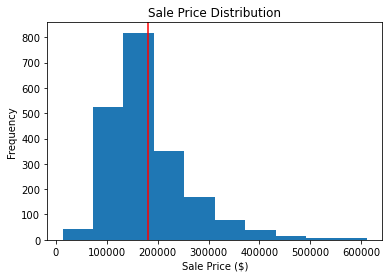

In [32]:
plt.hist(train["SalePrice"])
plt.axvline(train["SalePrice"].mean(), color="red")
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price ($)")
plt.ylabel("Frequency");

We can observe a right skew on the Sale Price distribution. Since one of the assumptions of linear regression is normality, sale price should be logged in order to normalize the distribution when assigned as "y". See below to see visualization of a relatively more normally distributed Sale Price.

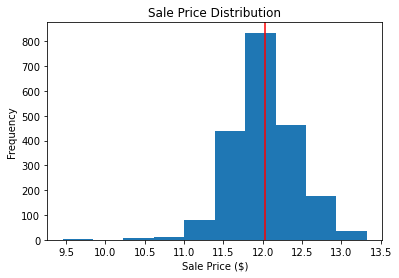

In [33]:
plt.hist(np.log1p(train["SalePrice"]))
plt.axvline(np.log1p(train["SalePrice"]).mean(), color="red")
plt.title("Sale Price Distribution")
plt.xlabel("Sale Price ($)")
plt.ylabel("Frequency");

**Analysis on Categoricals**

To analyse further the relationship of other columns to the column we want to predict (SalePrice), heatmaps can be used to visualise their correlations. Due to the nature of categorical columns not being shown within a heatmap, it is necessary to create numerical features based on categorical columns by using the *.get_dummies()* function to enable the calculation of correlation between Sale Price and said columns. Because of the number of columns, each columns are categorized based on potential relations with one another, and are then individually analysed for its relations to Sale Price. Based on the correlation, new features will be engineered accordingly to be able to create a model which would be able to accurately predict the price to help the client's customers determine a good price for them to sell their house. 

Feature engineering methods used:
- Binning
- Creating binary classification of columns
- Numifying qualitative features
- Creation of interactive columns

Those with low correlation (corr < 0.25 and corr > -0.25) will be dropped to avoid overfitting.

In [34]:
train["Neighborhood"].value_counts(normalize = True)

NAmes      0.151146
CollgCr    0.087762
OldTown    0.079473
Edwards    0.069722
Somerst    0.063384
NridgHt    0.059483
Gilbert    0.056558
Sawyer     0.054120
SawyerW    0.042418
NWAmes     0.042418
Mitchel    0.039980
BrkSide    0.037055
Crawfor    0.034617
IDOTRR     0.033642
Timber     0.023403
NoRidge    0.023403
StoneBr    0.018528
SWISU      0.015602
ClearCr    0.013164
MeadowV    0.011702
Blmngtn    0.010726
BrDale     0.009264
Veenker    0.008289
NPkVill    0.008289
Blueste    0.002925
Greens     0.001463
GrnHill    0.000975
Landmrk    0.000488
Name: Neighborhood, dtype: float64

In [35]:
# function for heatmap creation
def heatmap_func(dataframe,title, w,h):
    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True
    
    plt.figure(figsize=(w,h))
    sns.heatmap(data = dataframe.corr(),
                annot=True, 
                vmin=-1, 
                vmax = 1,
                cmap="coolwarm",
                mask=mask)
    plt.title(title, size=18)
    plt.tight_layout();

In [36]:
# train_model is created so that changes for the model dataframe can be made without permenantly changing the original cleaned dataset
train_model = train

In [37]:
train_subclass = train[["SalePrice","MS SubClass","MS Zoning"]]
train_subclass = pd.get_dummies(train_subclass, columns = ["MS SubClass","MS Zoning"], drop_first = True)

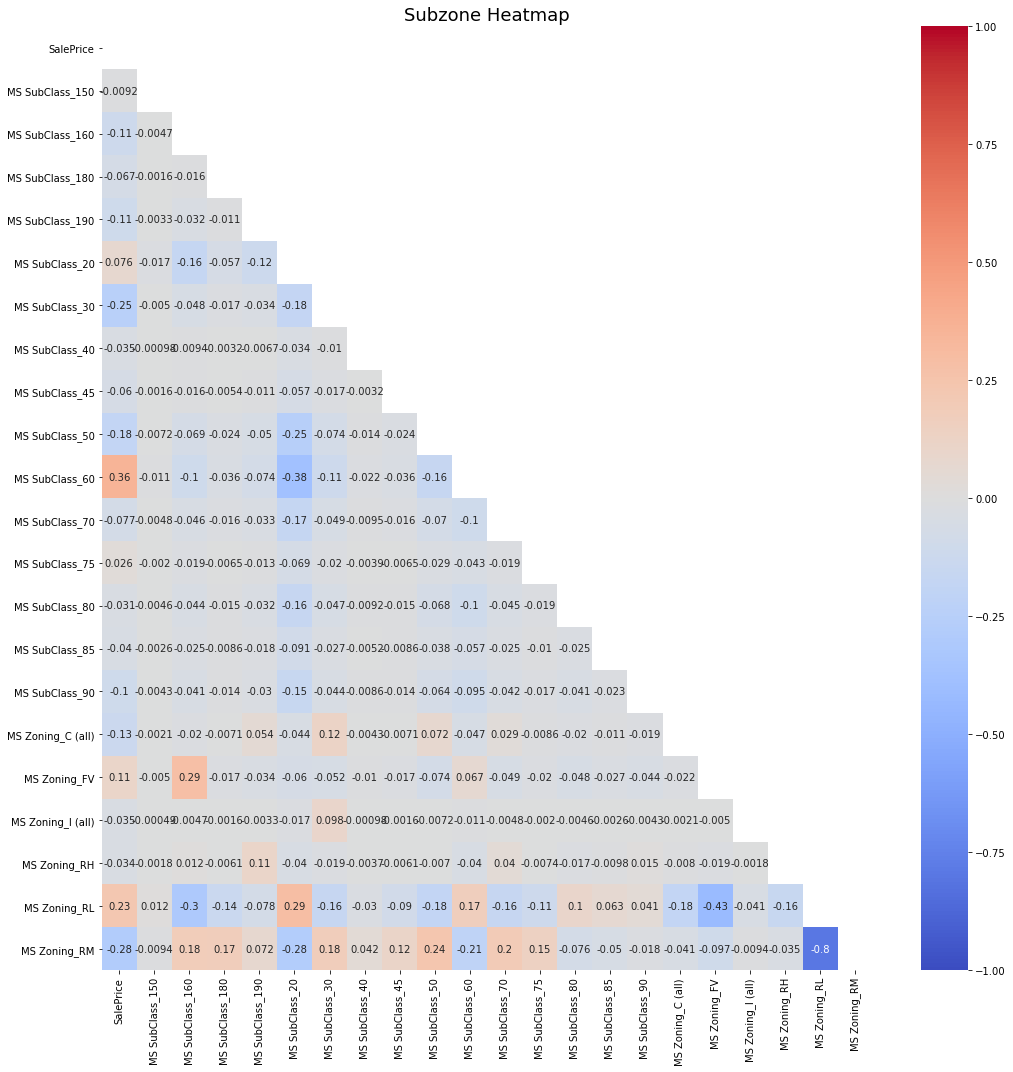

In [38]:
heatmap_func(train_subclass,"Subzone Heatmap",15,15)

In [39]:
train_model["is_subclass_60"] = [1 if cell == "60" else 0 for cell in train_model["MS SubClass"]]
train_model["is_subclass_30"] = [1 if cell == "30" else 0 for cell in train_model["MS SubClass"]]
train_model["is_medium_density"] = [1 if cell == "RM" else 0 for cell in train_model["MS Zoning"]]
train_model.drop(columns = ["MS SubClass","MS Zoning"], inplace=True)

train_model.head()

Id        PID  Lot Frontage  Lot Area Street Alley Lot Shape Land Contour  \
0  109  533352170     72.774648     13517   Pave    No       IR1          Lvl   
1  544  531379050     43.000000     11492   Pave    No       IR1          Lvl   
2  153  535304180     68.000000      7922   Pave    No       Reg          Lvl   
3  318  916386060     73.000000      9802   Pave    No       Reg          Lvl   
4  255  906425045     82.000000     14235   Pave    No       IR1          Lvl   

  Utilities Lot Config  ... Fence Misc Feature Misc Val Mo Sold Yr Sold  \
0    AllPub    CulDSac  ...    No           No        0       3    2010   
1    AllPub    CulDSac  ...    No           No        0       4    2009   
2    AllPub     Inside  ...    No           No        0       1    2010   
3    AllPub     Inside  ...    No           No        0       4    2010   
4    AllPub     Inside  ...    No           No        0       3    2010   

  Sale Type  SalePrice  is_subclass_60  is_subclass_30  is_medium_density  
0       WD      130500               1               0                  0  
1       WD      220000               1               0                  0  
2       WD      109000               0               0                  0  
3       WD      174000               1               0                  0  
4       WD      138500               0               0                  0  

[5 rows x 82 columns]

In [40]:
train_lots = train[["SalePrice",
                    "Lot Frontage",
                    "Lot Area",
                    "Street",
                    "Alley",
                    "Lot Shape",
                    "Land Contour",
                    "Lot Config",
                    "Land Slope"
                   ]]
train_lots = pd.get_dummies(train_lots, columns = ["Street",
                                                   "Alley",
                                                   "Lot Shape",
                                                   "Land Contour",
                                                   "Lot Config",
                                                   "Land Slope"], drop_first = True)

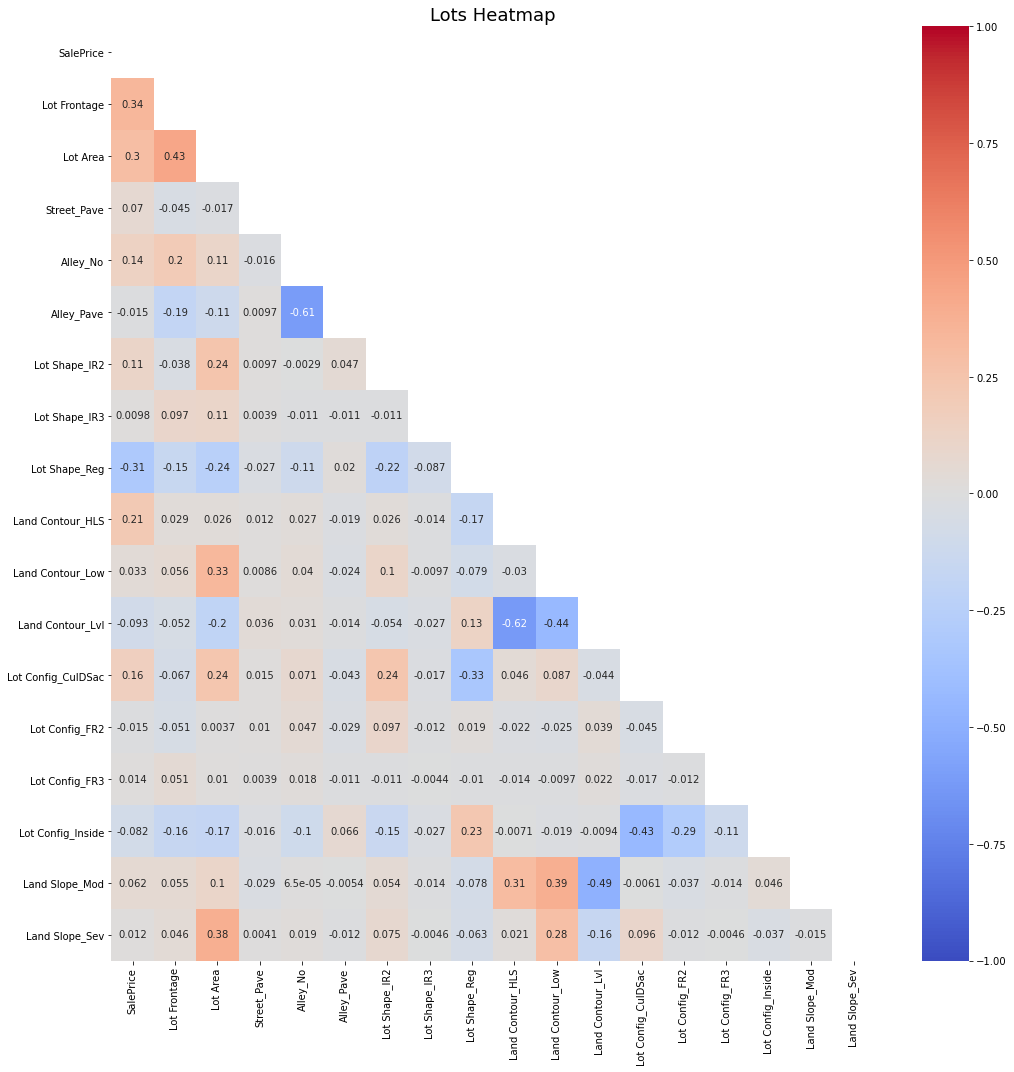

In [41]:
heatmap_func(train_lots,"Lots Heatmap",15,15)

In [42]:
train_model["is_shape_reg"] = [1 if cell == "Reg" else 0 for cell in train_model["Lot Shape"]]
train_model.drop(columns = ["Street",
                            "Alley",
                            "Lot Shape",
                            "Land Contour",
                            "Lot Config",
                            "Land Slope"], inplace=True)

train_model.head()

Id        PID  Lot Frontage  Lot Area Utilities Neighborhood Condition 1  \
0  109  533352170     72.774648     13517    AllPub       Sawyer        RRAe   
1  544  531379050     43.000000     11492    AllPub      SawyerW        Norm   
2  153  535304180     68.000000      7922    AllPub        NAmes        Norm   
3  318  916386060     73.000000      9802    AllPub       Timber        Norm   
4  255  906425045     82.000000     14235    AllPub      SawyerW        Norm   

  Condition 2 Bldg Type House Style  ...  Misc Feature  Misc Val  Mo Sold  \
0        Norm      1Fam      2Story  ...            No         0        3   
1        Norm      1Fam      2Story  ...            No         0        4   
2        Norm      1Fam      1Story  ...            No         0        1   
3        Norm      1Fam      2Story  ...            No         0        4   
4        Norm      1Fam      1.5Fin  ...            No         0        3   

   Yr Sold Sale Type SalePrice is_subclass_60 is_subclass_30  \
0     2010       WD     130500              1              0   
1     2009       WD     220000              1              0   
2     2010       WD     109000              0              0   
3     2010       WD     174000              1              0   
4     2010       WD     138500              0              0   

  is_medium_density  is_shape_reg  
0                 0             0  
1                 0             0  
2                 0             1  
3                 0             1  
4                 0             0  

[5 rows x 77 columns]

In [43]:
train_utilities = train[["SalePrice",
                         "Utilities",
                         "Heating",
                         "Heating QC",
                         "Central Air",
                         "Electrical",
                         "Fireplaces",
                         "Fireplace Qu"]]

train_utilities = pd.get_dummies(train_utilities, columns = ["Utilities",
                                                             "Heating",
                                                             "Heating QC",
                                                             "Central Air",
                                                             "Electrical",
                                                             "Fireplace Qu"], drop_first = True)

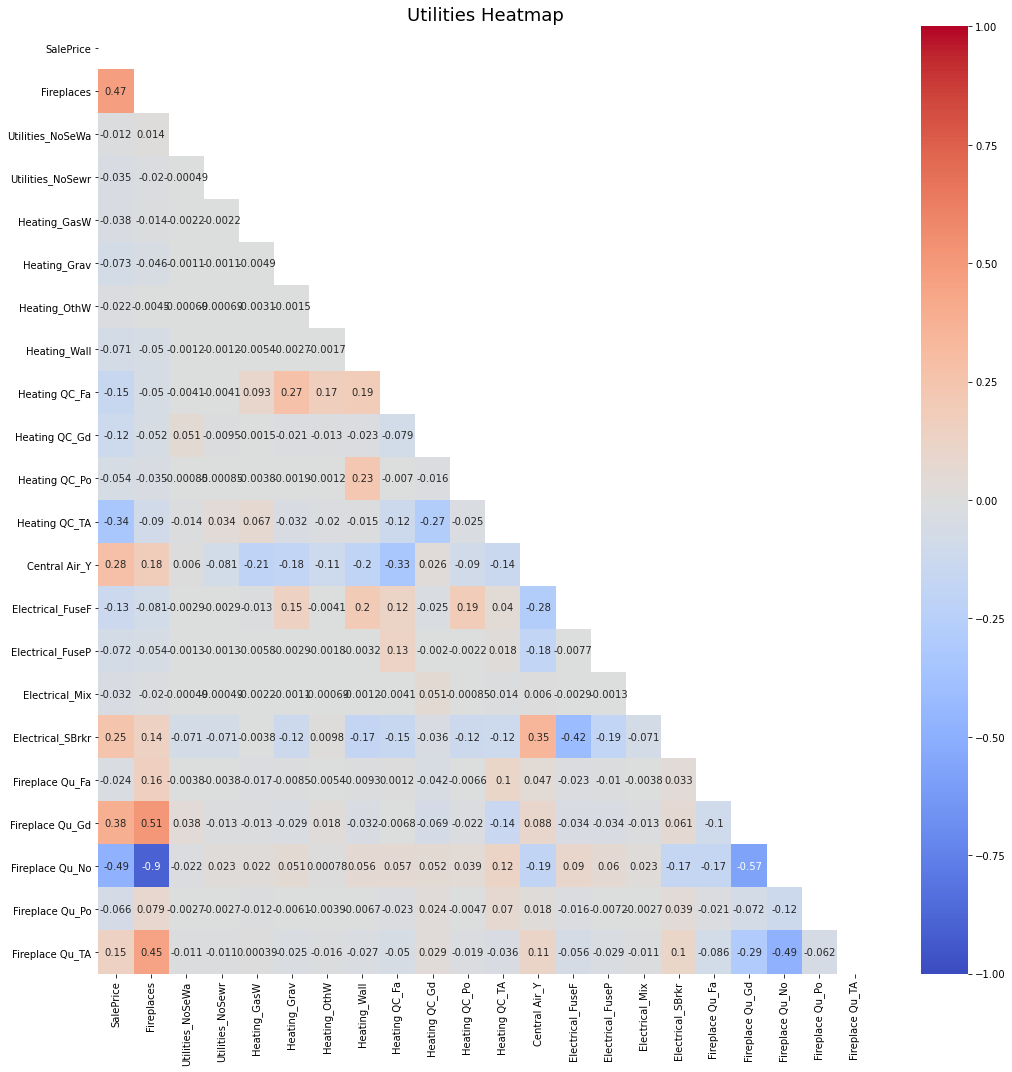

In [44]:
heatmap_func(train_utilities,"Utilities Heatmap",15,15)

In [45]:
train_model["is_heating_good"] = [5 if cell == "Ex"
                                    else 4 if cell == "Gd"
                                    else 3 if cell == "TA"
                                    else 2 if cell == "Fa"
                                    else 1 if cell == "Po"
                                    else 0 for cell in train_model["Heating QC"]]
train_model["is_fireplace_good"] = [5 if cell == "Ex"
                                    else 4 if cell == "Gd"
                                    else 3 if cell == "TA"
                                    else 2 if cell == "Fa"
                                    else 1 if cell == "Po"
                                    else 0 for cell in train_model["Fireplace Qu"]]
train_model["electic_SBrkr"] = [1 if cell == "SBrkr" else 0 for cell in train_model["Electrical"]]
train_model["is_central_air"] = [1 if cell == "Y" else 0 for cell in train_model["Central Air"]]
train_model.drop(columns = ["Utilities",
                            "Heating",
                            "Heating QC",
                            "Central Air",
                            "Electrical",
                            "Fireplace Qu"], inplace=True)

train_model.head()

Id        PID  Lot Frontage  Lot Area Neighborhood Condition 1  \
0  109  533352170     72.774648     13517       Sawyer        RRAe   
1  544  531379050     43.000000     11492      SawyerW        Norm   
2  153  535304180     68.000000      7922        NAmes        Norm   
3  318  916386060     73.000000      9802       Timber        Norm   
4  255  906425045     82.000000     14235      SawyerW        Norm   

  Condition 2 Bldg Type House Style  Overall Qual  ...  Sale Type  SalePrice  \
0        Norm      1Fam      2Story             6  ...        WD      130500   
1        Norm      1Fam      2Story             7  ...        WD      220000   
2        Norm      1Fam      1Story             5  ...        WD      109000   
3        Norm      1Fam      2Story             5  ...        WD      174000   
4        Norm      1Fam      1.5Fin             6  ...        WD      138500   

   is_subclass_60 is_subclass_30 is_medium_density is_shape_reg  \
0               1              0                 0            0   
1               1              0                 0            0   
2               0              0                 0            1   
3               1              0                 0            1   
4               0              0                 0            0   

  is_heating_good is_fireplace_good  electic_SBrkr is_central_air  
0               5                 0              1              1  
1               5                 3              1              1  
2               3                 0              1              1  
3               4                 0              1              1  
4               3                 0              1              1  

[5 rows x 75 columns]

In [46]:
train_neighborhood = train[["SalePrice","Neighborhood","PID"]]
train_neighborhood = pd.get_dummies(train_neighborhood, columns = ["Neighborhood"], drop_first = True)

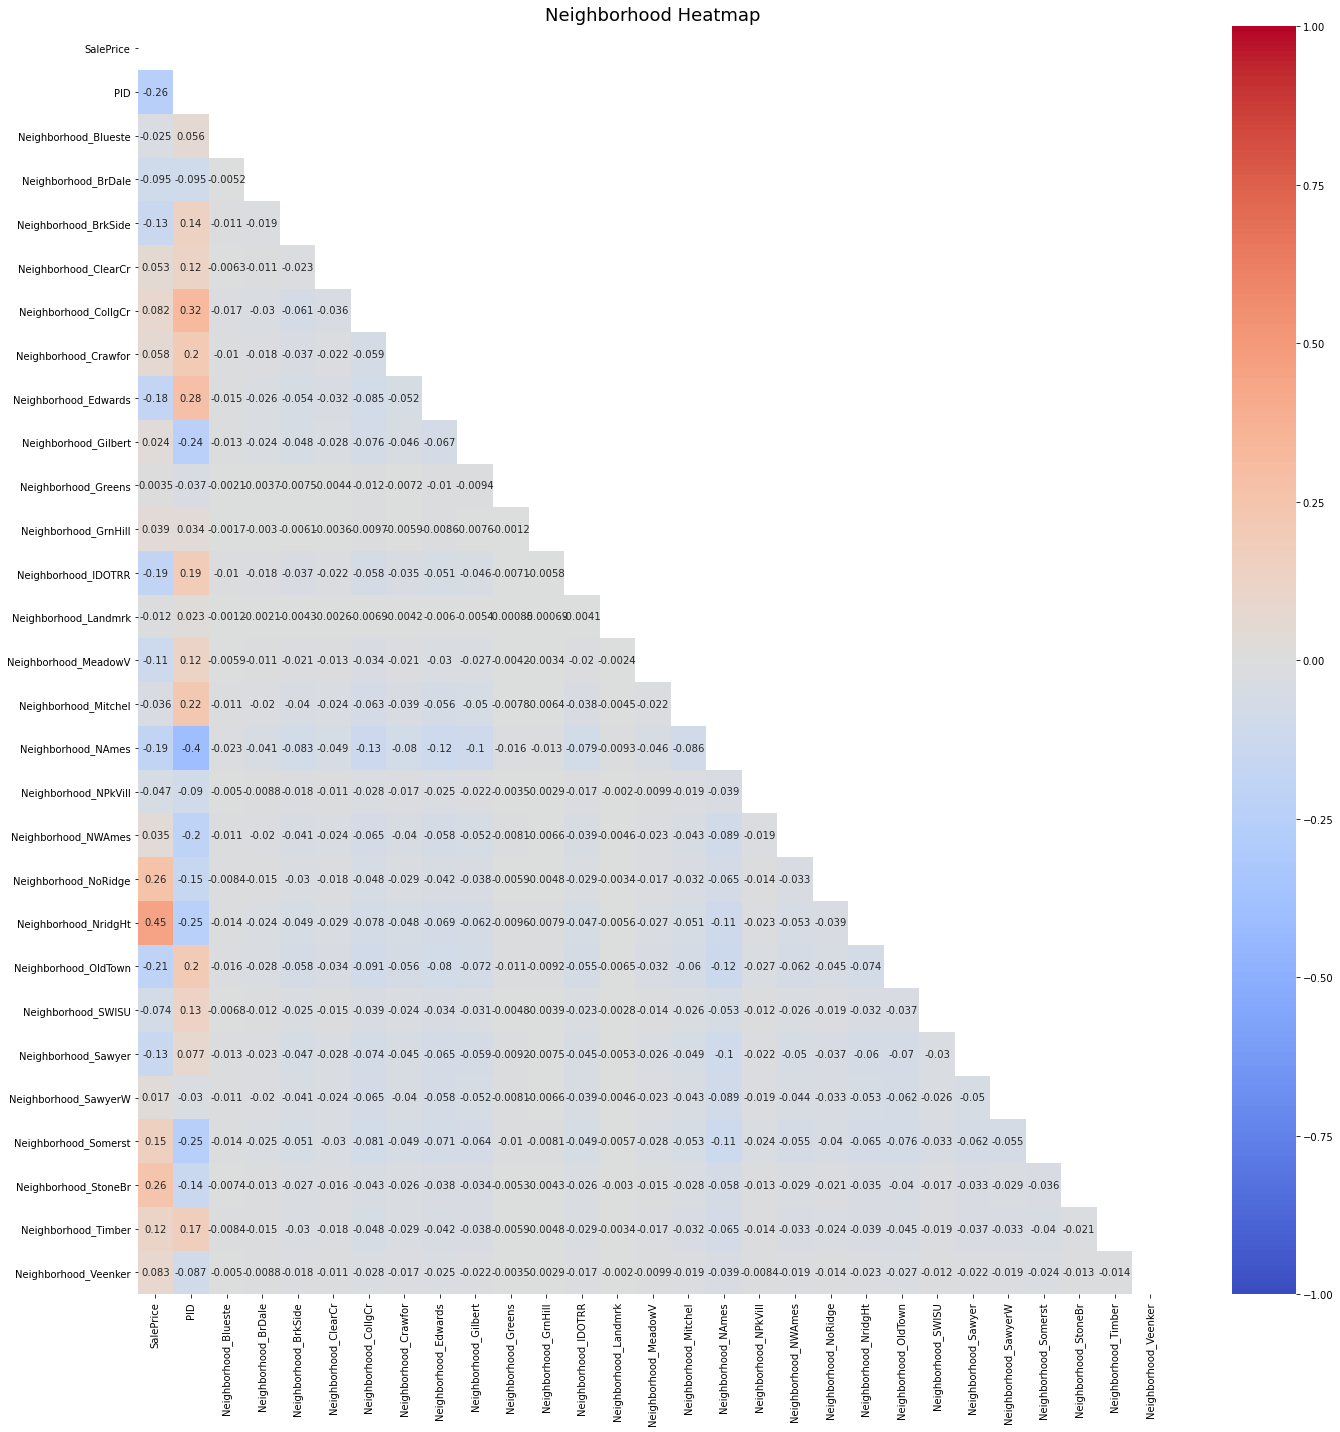

In [47]:
heatmap_func(train_neighborhood,"Neighborhood Heatmap",20,20)

In [48]:
relatively_high_correlated_neighborhood = ["NridgHt",
                                           "NoRidge",
                                           "StoneBr"]

train_model["Neighborhood"] = [cell if cell in relatively_high_correlated_neighborhood else "others" for cell in train_model["Neighborhood"]]
train_model = pd.get_dummies(train_model, columns = ["Neighborhood"], drop_first = True)

train_model.head()

Id        PID  Lot Frontage  Lot Area Condition 1 Condition 2 Bldg Type  \
0  109  533352170     72.774648     13517        RRAe        Norm      1Fam   
1  544  531379050     43.000000     11492        Norm        Norm      1Fam   
2  153  535304180     68.000000      7922        Norm        Norm      1Fam   
3  318  916386060     73.000000      9802        Norm        Norm      1Fam   
4  255  906425045     82.000000     14235        Norm        Norm      1Fam   

  House Style  Overall Qual  Overall Cond  ...  is_subclass_30  \
0      2Story             6             8  ...               0   
1      2Story             7             5  ...               0   
2      1Story             5             7  ...               0   
3      2Story             5             5  ...               0   
4      1.5Fin             6             8  ...               0   

   is_medium_density is_shape_reg is_heating_good is_fireplace_good  \
0                  0            0               5                 0   
1                  0            0               5                 3   
2                  0            1               3                 0   
3                  0            1               4                 0   
4                  0            0               3                 0   

  electic_SBrkr is_central_air  Neighborhood_NridgHt Neighborhood_StoneBr  \
0             1              1                     0                    0   
1             1              1                     0                    0   
2             1              1                     0                    0   
3             1              1                     0                    0   
4             1              1                     0                    0   

  Neighborhood_others  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  

[5 rows x 77 columns]

In [49]:
train_condition = train[["SalePrice","Condition 1","Condition 2"]]
train_condition = pd.get_dummies(train_condition, columns = ["Condition 1","Condition 2"], drop_first = True)

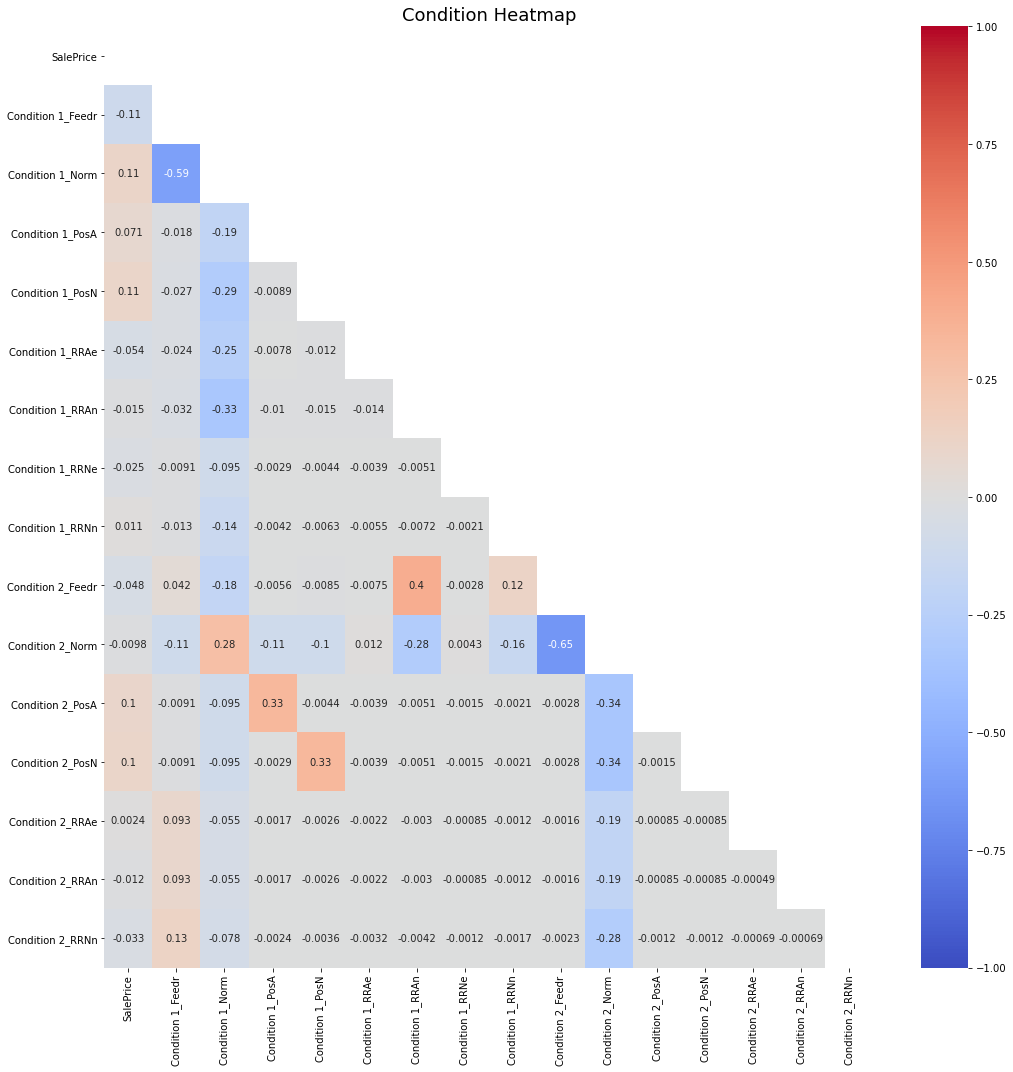

In [50]:
heatmap_func(train_condition,"Condition Heatmap",15,15)

In [51]:
train_model.drop(columns = ["Condition 1","Condition 2"], inplace=True)

train_model.head()

Id        PID  Lot Frontage  Lot Area Bldg Type House Style  Overall Qual  \
0  109  533352170     72.774648     13517      1Fam      2Story             6   
1  544  531379050     43.000000     11492      1Fam      2Story             7   
2  153  535304180     68.000000      7922      1Fam      1Story             5   
3  318  916386060     73.000000      9802      1Fam      2Story             5   
4  255  906425045     82.000000     14235      1Fam      1.5Fin             6   

   Overall Cond  Year Built  Year Remod/Add  ... is_subclass_30  \
0             8        1976            2005  ...              0   
1             5        1996            1997  ...              0   
2             7        1953            2007  ...              0   
3             5        2006            2007  ...              0   
4             8        1900            1993  ...              0   

  is_medium_density is_shape_reg is_heating_good is_fireplace_good  \
0                 0            0               5                 0   
1                 0            0               5                 3   
2                 0            1               3                 0   
3                 0            1               4                 0   
4                 0            0               3                 0   

   electic_SBrkr is_central_air Neighborhood_NridgHt Neighborhood_StoneBr  \
0              1              1                    0                    0   
1              1              1                    0                    0   
2              1              1                    0                    0   
3              1              1                    0                    0   
4              1              1                    0                    0   

  Neighborhood_others  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  

[5 rows x 75 columns]

In [52]:
train_style = train[["SalePrice",
                     "Bldg Type",
                     "House Style",
                     "Roof Style",
                     "Roof Matl",
                     "Foundation",
                     "Mas Vnr Type",
                     "Mas Vnr Area"]]
                     
                     
train_style = pd.get_dummies(train_style, columns = ["Bldg Type",
                                                     "House Style",
                                                     "Roof Style",
                                                     "Roof Matl",
                                                     "Foundation",
                                                     "Mas Vnr Type"], drop_first = True)

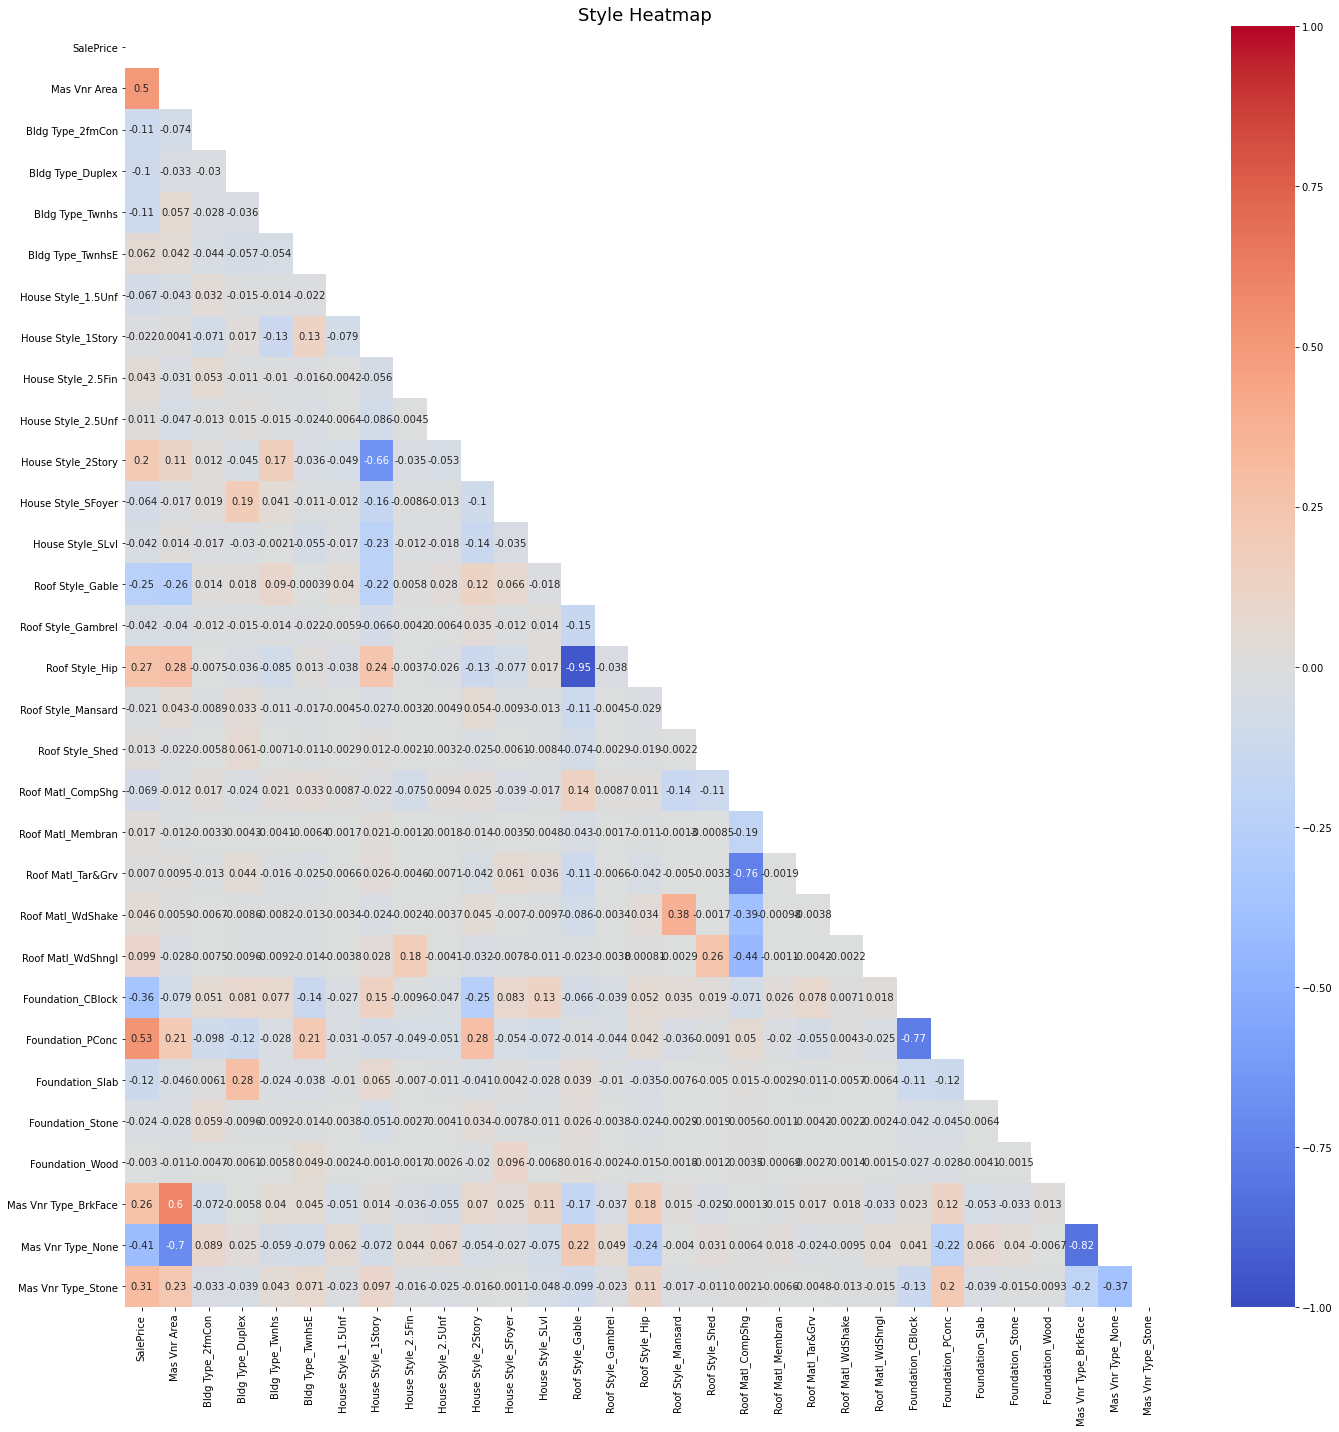

In [53]:
heatmap_func(train_style,"Style Heatmap",20,20)

In [54]:
train_model["is_pconc"] = [1 if cell == "PConc" else 0 for cell in train_model["Foundation"]]
train_model["is_cblock"] = [1 if cell == "CBlock" else 0 for cell in train_model["Foundation"]]
train_model["is_vnr"] = [1 if cell != "None" else 0 for cell in train_model["Mas Vnr Type"]]
train_model["is_roof_hip"] = [1 if cell != "Hip" else 0 for cell in train_model["Roof Style"]]
train_model["is_roof_gable"] = [1 if cell != "Gable" else 0 for cell in train_model["Roof Style"]]
train_model.drop(columns = ["Bldg Type",
                            "House Style",
                            "Roof Style",
                            "Roof Matl",
                            "Foundation",
                            "Mas Vnr Type"], inplace=True)

train_model.head()

Id        PID  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0  109  533352170     72.774648     13517             6             8   
1  544  531379050     43.000000     11492             7             5   
2  153  535304180     68.000000      7922             5             7   
3  318  916386060     73.000000      9802             5             5   
4  255  906425045     82.000000     14235             6             8   

   Year Built  Year Remod/Add Exterior 1st Exterior 2nd  ...  electic_SBrkr  \
0        1976            2005      HdBoard      Plywood  ...              1   
1        1996            1997      VinylSd      VinylSd  ...              1   
2        1953            2007      VinylSd      VinylSd  ...              1   
3        2006            2007      VinylSd      VinylSd  ...              1   
4        1900            1993      Wd Sdng      Plywood  ...              1   

  is_central_air Neighborhood_NridgHt Neighborhood_StoneBr  \
0              1                    0                    0   
1              1                    0                    0   
2              1                    0                    0   
3              1                    0                    0   
4              1                    0                    0   

  Neighborhood_others is_pconc is_cblock  is_vnr is_roof_hip  is_roof_gable  
0                   1        0         1       1           1              0  
1                   1        1         0       1           1              0  
2                   1        0         1       0           1              0  
3                   1        1         0       0           1              0  
4                   1        1         0       0           1              0  

[5 rows x 74 columns]

In [55]:
train_ext = train[["SalePrice",
                     "Exterior 1st",
                     "Exterior 2nd",
                     "Exter Qual",
                     "Exter Cond"]]
                     
                     
train_ext = pd.get_dummies(train_ext, columns = ["Exterior 1st",
                     "Exterior 2nd",
                     "Exter Qual",
                     "Exter Cond"], drop_first = True)

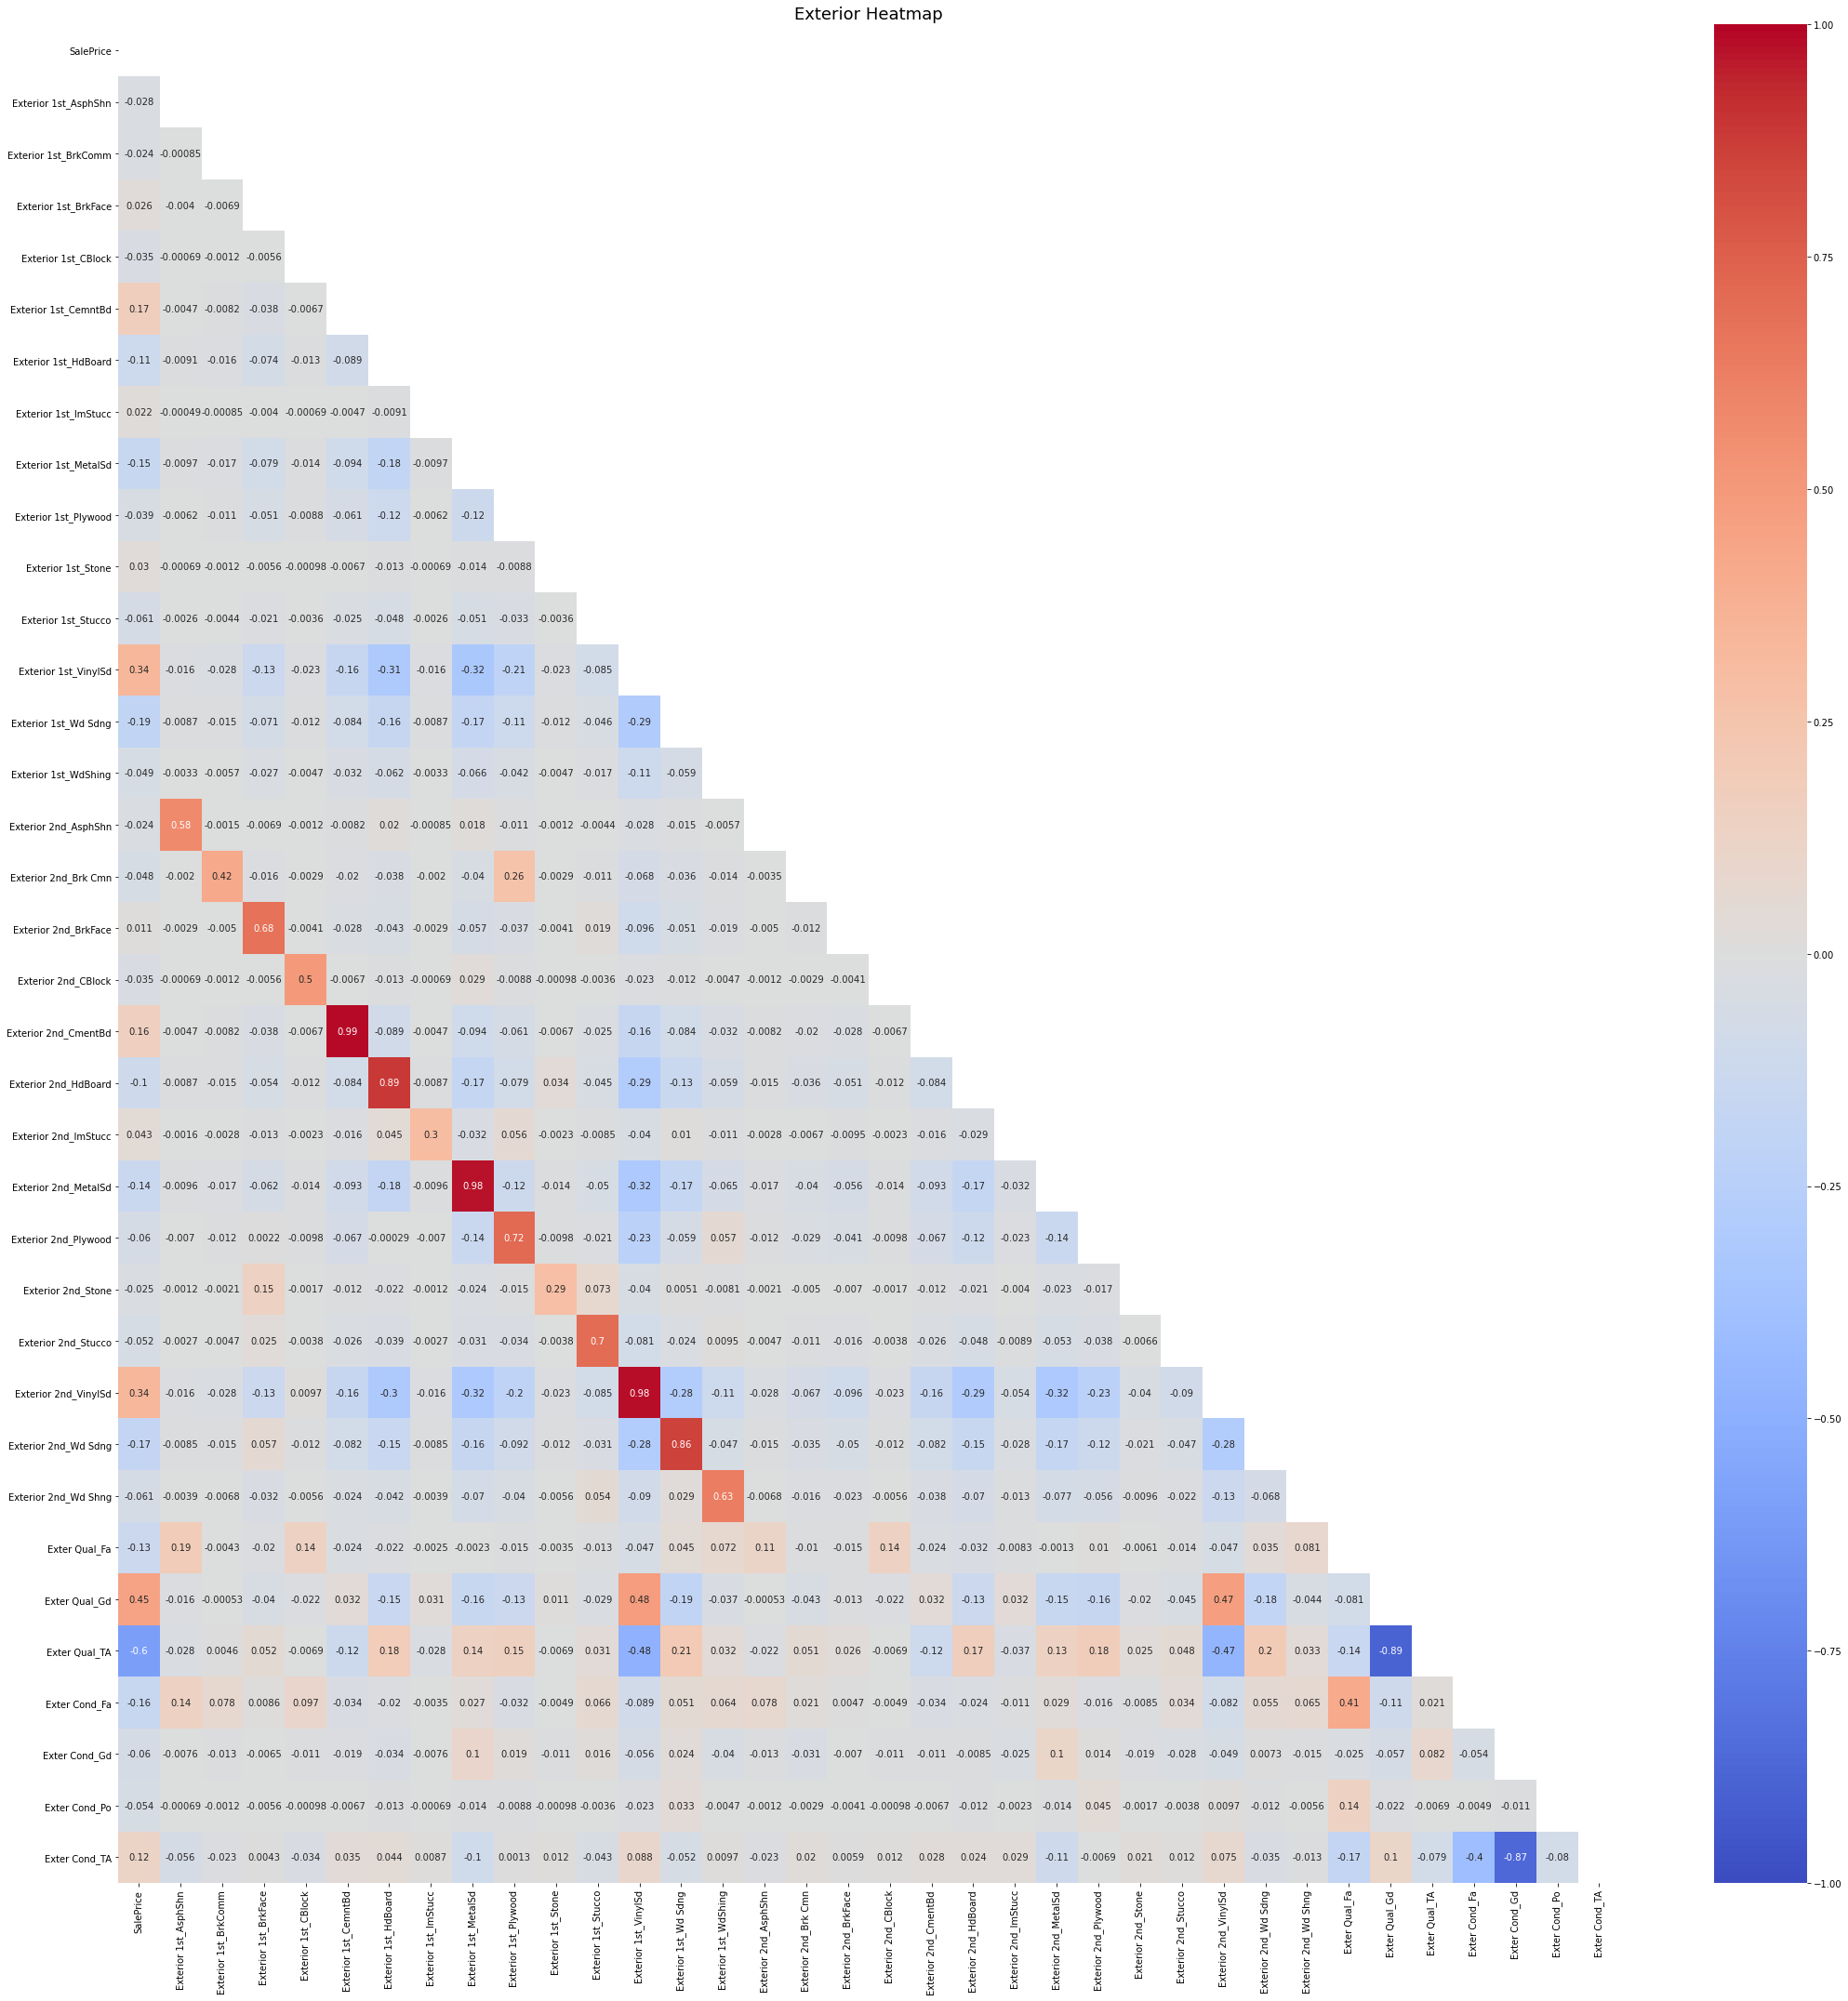

In [56]:
heatmap_func(train_ext,"Exterior Heatmap",30,30)

In [57]:
train_model["1st_vinyl"] = [1 if cell == "VinylSd" else 0 for cell in train_model["Exterior 1st"]]
train_model["2nd_vinyl"] = [1 if cell == "VinylSd" else 0 for cell in train_model["Exterior 2nd"]]
train_model["is_ext_vinyl"] = train_model["1st_vinyl"] + train_model["2nd_vinyl"]
# for categorical columns that have relatively higher correlation, the value of each mark is squared (so it's weighted)
train_model["is_ext_qual_good"] = [5 if cell == "Ex"
                                    else 4 if cell == "Gd"
                                    else 3 if cell == "TA"
                                    else 2 if cell == "Fa"
                                    else 1 if cell == "Po"
                                    else 0 for cell in train_model["Exter Qual"]]

train_model.drop(columns = ["Exterior 1st",
                            "Exterior 2nd",
                            "Exter Qual",
                            "Exter Cond",
                           "1st_vinyl",
                           "2nd_vinyl"], inplace=True)

train_model.head()

Id        PID  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0  109  533352170     72.774648     13517             6             8   
1  544  531379050     43.000000     11492             7             5   
2  153  535304180     68.000000      7922             5             7   
3  318  916386060     73.000000      9802             5             5   
4  255  906425045     82.000000     14235             6             8   

   Year Built  Year Remod/Add  Mas Vnr Area Bsmt Qual  ...  \
0        1976            2005         289.0        TA  ...   
1        1996            1997         132.0        Gd  ...   
2        1953            2007           0.0        TA  ...   
3        2006            2007           0.0        Gd  ...   
4        1900            1993           0.0        Fa  ...   

  Neighborhood_NridgHt Neighborhood_StoneBr Neighborhood_others  is_pconc  \
0                    0                    0                   1         0   
1                    0                    0                   1         1   
2                    0                    0                   1         0   
3                    0                    0                   1         1   
4                    0                    0                   1         1   

  is_cblock  is_vnr  is_roof_hip  is_roof_gable  is_ext_vinyl  \
0         1       1            1              0             0   
1         0       1            1              0             2   
2         1       0            1              0             2   
3         0       0            1              0             2   
4         0       0            1              0             0   

   is_ext_qual_good  
0                 4  
1                 4  
2                 3  
3                 3  
4                 3  

[5 rows x 72 columns]

In [58]:
train_bsmt = train[["SalePrice"] + bsmt_columns]

train_bsmt = pd.get_dummies(train_bsmt, columns = [columns for columns in bsmt_columns if columns in categorical], 
                            drop_first = True)

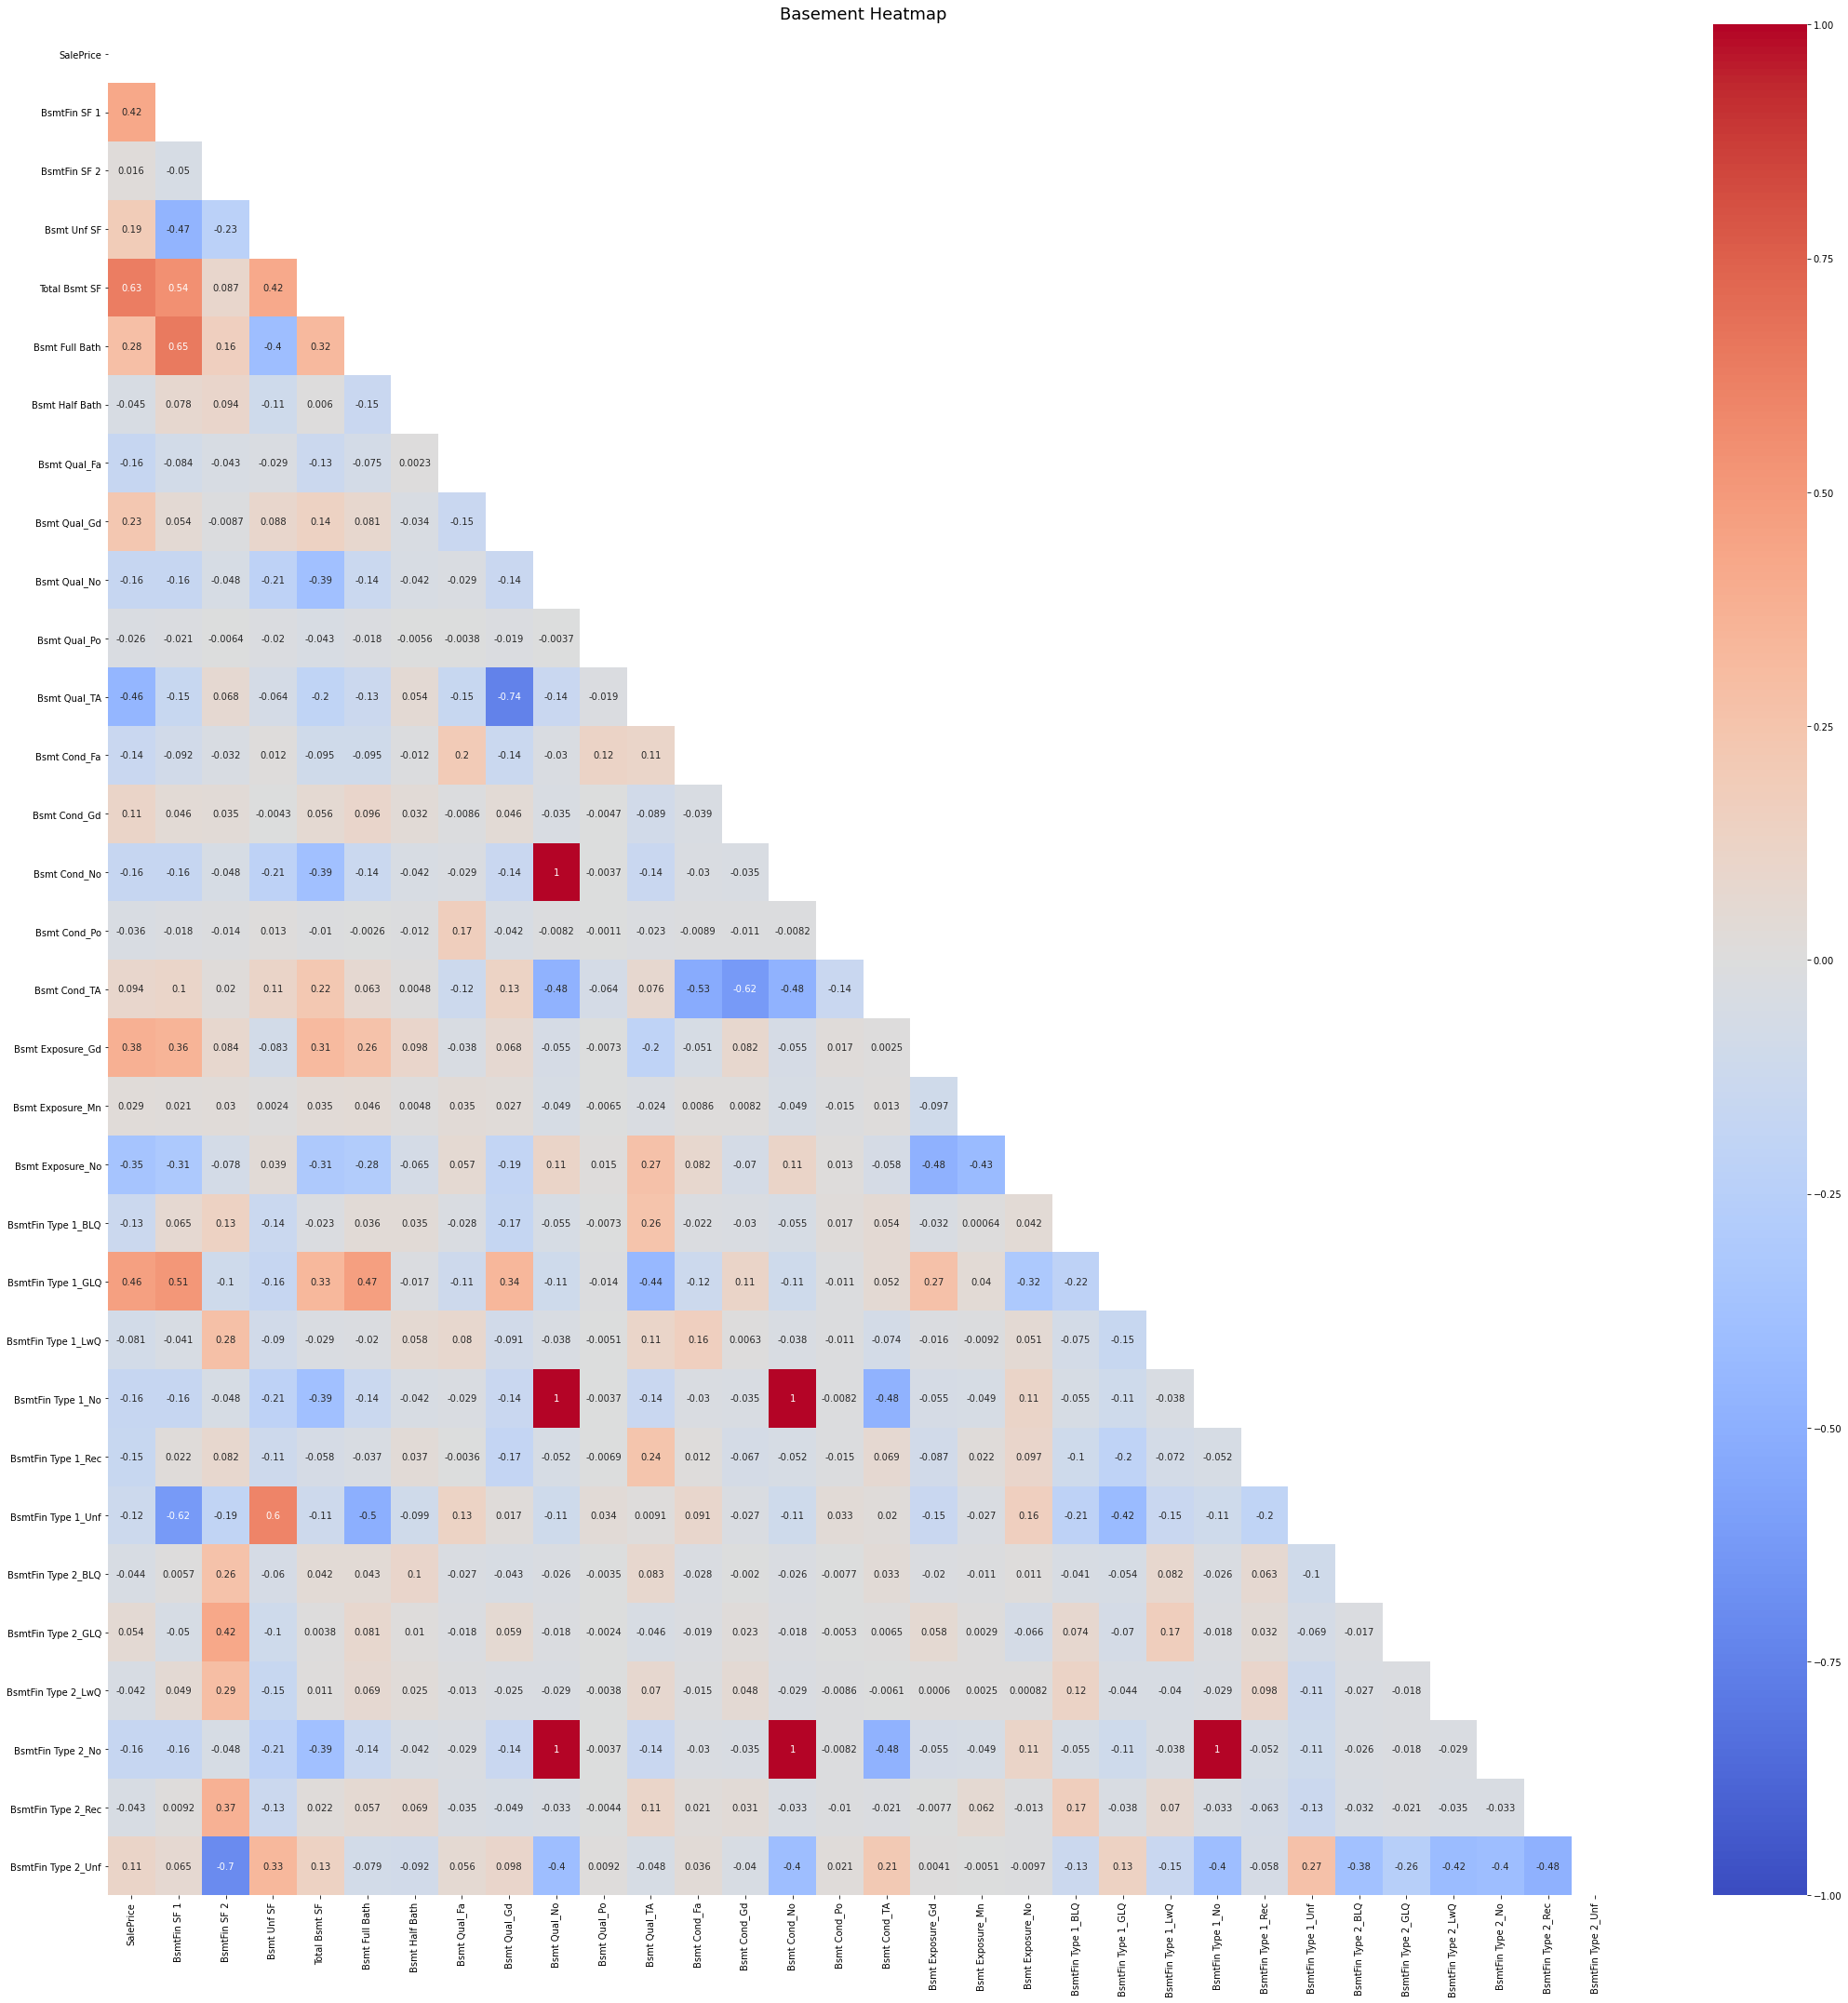

In [59]:
heatmap_func(train_bsmt,"Basement Heatmap",30,30)

In [60]:
train_model["is_bst_qual_gd"] = [5 if cell == "Ex"
                                    else 4 if cell == "Gd"
                                    else 3 if cell == "TA"
                                    else 2 if cell == "Fa"
                                    else 1 if cell == "Po"
                                    else 0 for cell in train_model["Bsmt Qual"]]
train_model["is_bst_exp_gd"] = [5 if cell == "Ex"
                                    else 4 if cell == "Gd"
                                    else 3 if cell == "TA"
                                    else 2 if cell == "Fa"
                                    else 1 if cell == "Po"
                                    else 0 for cell in train_model["Bsmt Exposure"]]
train_model["bsmt_fin_1"] = [6 if cell == "GLQ"
                             else 5 if cell == "ALQ"
                                    else 4 if cell == "BLQ"
                                    else 3 if cell == "Rec"
                                    else 2 if cell == "LwQ"
                                    else 1 if cell == "Unf"
                                    else 0 for cell in train_model["BsmtFin Type 1"]]
train_model["bsmt_fin_2"] = [6 if cell == "GLQ"
                             else 5 if cell == "ALQ"
                                    else 4 if cell == "BLQ"
                                    else 3 if cell == "Rec"
                                    else 2 if cell == "LwQ"
                                    else 1 if cell == "Unf"
                                    else 0 for cell in train_model["BsmtFin Type 2"]]
train_model["is_bsmt_glq"] = train_model["bsmt_fin_1"] + train_model["bsmt_fin_2"] 

train_model.drop(columns = [columns for columns in bsmt_columns if columns in categorical] + ["bsmt_fin_2","bsmt_fin_1"]
                 , inplace=True)

train_model.head()

Id        PID  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0  109  533352170     72.774648     13517             6             8   
1  544  531379050     43.000000     11492             7             5   
2  153  535304180     68.000000      7922             5             7   
3  318  916386060     73.000000      9802             5             5   
4  255  906425045     82.000000     14235             6             8   

   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  ...  is_pconc  \
0        1976            2005         289.0         533.0  ...         0   
1        1996            1997         132.0         637.0  ...         1   
2        1953            2007           0.0         731.0  ...         0   
3        2006            2007           0.0           0.0  ...         1   
4        1900            1993           0.0           0.0  ...         1   

   is_cblock  is_vnr  is_roof_hip  is_roof_gable  is_ext_vinyl  \
0          1       1            1              0             0   
1          0       1            1              0             2   
2          1       0            1              0             2   
3          0       0            1              0             2   
4          0       0            1              0             0   

   is_ext_qual_good  is_bst_qual_gd  is_bst_exp_gd  is_bsmt_glq  
0                 4               3              0            7  
1                 4               4              0            7  
2                 3               3              0            7  
3                 3               4              0            2  
4                 3               2              0            2  

[5 rows x 70 columns]

In [61]:
train_kitchen = train[["SalePrice","Kitchen AbvGr","Kitchen Qual"]]

train_kitchen = pd.get_dummies(train_kitchen, columns = ["Kitchen Qual"], 
                            drop_first = True)

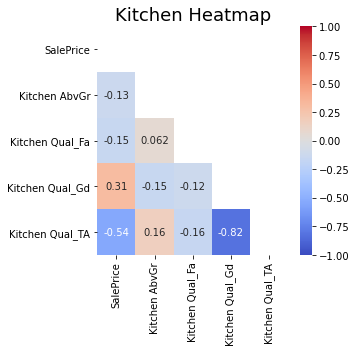

In [62]:
heatmap_func(train_kitchen,"Kitchen Heatmap",5,5)

In [63]:
train_model["is_ktch_gd"] = [5 if cell == "Ex"
                                    else 4 if cell == "Gd"
                                    else 3 if cell == "TA"
                                    else 2 if cell == "Fa"
                                    else 1 if cell == "Po"
                                    else 0 for cell in train_model["Kitchen Qual"]]

train_model.drop(columns = ["Kitchen Qual"], inplace=True)

train_model.head()

Id        PID  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0  109  533352170     72.774648     13517             6             8   
1  544  531379050     43.000000     11492             7             5   
2  153  535304180     68.000000      7922             5             7   
3  318  916386060     73.000000      9802             5             5   
4  255  906425045     82.000000     14235             6             8   

   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  ...  is_cblock  \
0        1976            2005         289.0         533.0  ...          1   
1        1996            1997         132.0         637.0  ...          0   
2        1953            2007           0.0         731.0  ...          1   
3        2006            2007           0.0           0.0  ...          0   
4        1900            1993           0.0           0.0  ...          0   

   is_vnr  is_roof_hip  is_roof_gable  is_ext_vinyl  is_ext_qual_good  \
0       1            1              0             0                 4   
1       1            1              0             2                 4   
2       0            1              0             2                 3   
3       0            1              0             2                 3   
4       0            1              0             0                 3   

   is_bst_qual_gd  is_bst_exp_gd  is_bsmt_glq  is_ktch_gd  
0               3              0            7           4  
1               4              0            7           4  
2               3              0            7           4  
3               4              0            2           3  
4               2              0            2           3  

[5 rows x 70 columns]

In [64]:
train_functionality = train[["SalePrice","Sale Type","Functional"]]

train_functionality = pd.get_dummies(train_functionality, columns = ["Sale Type","Functional"], 
                            drop_first = True)

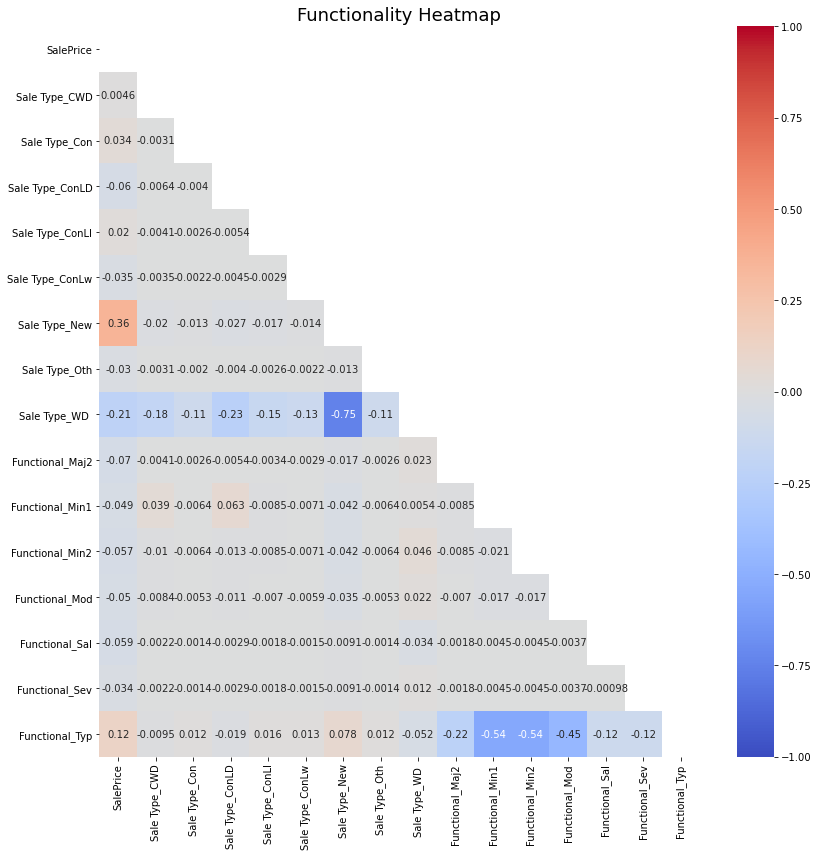

In [65]:
heatmap_func(train_functionality,"Functionality Heatmap",12,12)

In [66]:
train_model["is_new"] = [1 if cell == "New" else 0 for cell in train_model["Sale Type"]]

train_model.drop(columns = ["Sale Type","Functional"], inplace=True)

train_model.head()

Id        PID  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0  109  533352170     72.774648     13517             6             8   
1  544  531379050     43.000000     11492             7             5   
2  153  535304180     68.000000      7922             5             7   
3  318  916386060     73.000000      9802             5             5   
4  255  906425045     82.000000     14235             6             8   

   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  ...  is_vnr  \
0        1976            2005         289.0         533.0  ...       1   
1        1996            1997         132.0         637.0  ...       1   
2        1953            2007           0.0         731.0  ...       0   
3        2006            2007           0.0           0.0  ...       0   
4        1900            1993           0.0           0.0  ...       0   

   is_roof_hip  is_roof_gable  is_ext_vinyl  is_ext_qual_good  is_bst_qual_gd  \
0            1              0             0                 4               3   
1            1              0             2                 4               4   
2            1              0             2                 3               3   
3            1              0             2                 3               4   
4            1              0             0                 3               2   

   is_bst_exp_gd  is_bsmt_glq  is_ktch_gd  is_new  
0              0            7           4       0  
1              0            7           4       0  
2              0            7           4       0  
3              0            2           3       0  
4              0            2           3       0  

[5 rows x 69 columns]

In [67]:
train_garage = train[["SalePrice"] + garage_columns]

train_garage = pd.get_dummies(train_garage, columns = [columns for columns in garage_columns if columns in categorical], 
                            drop_first = True)

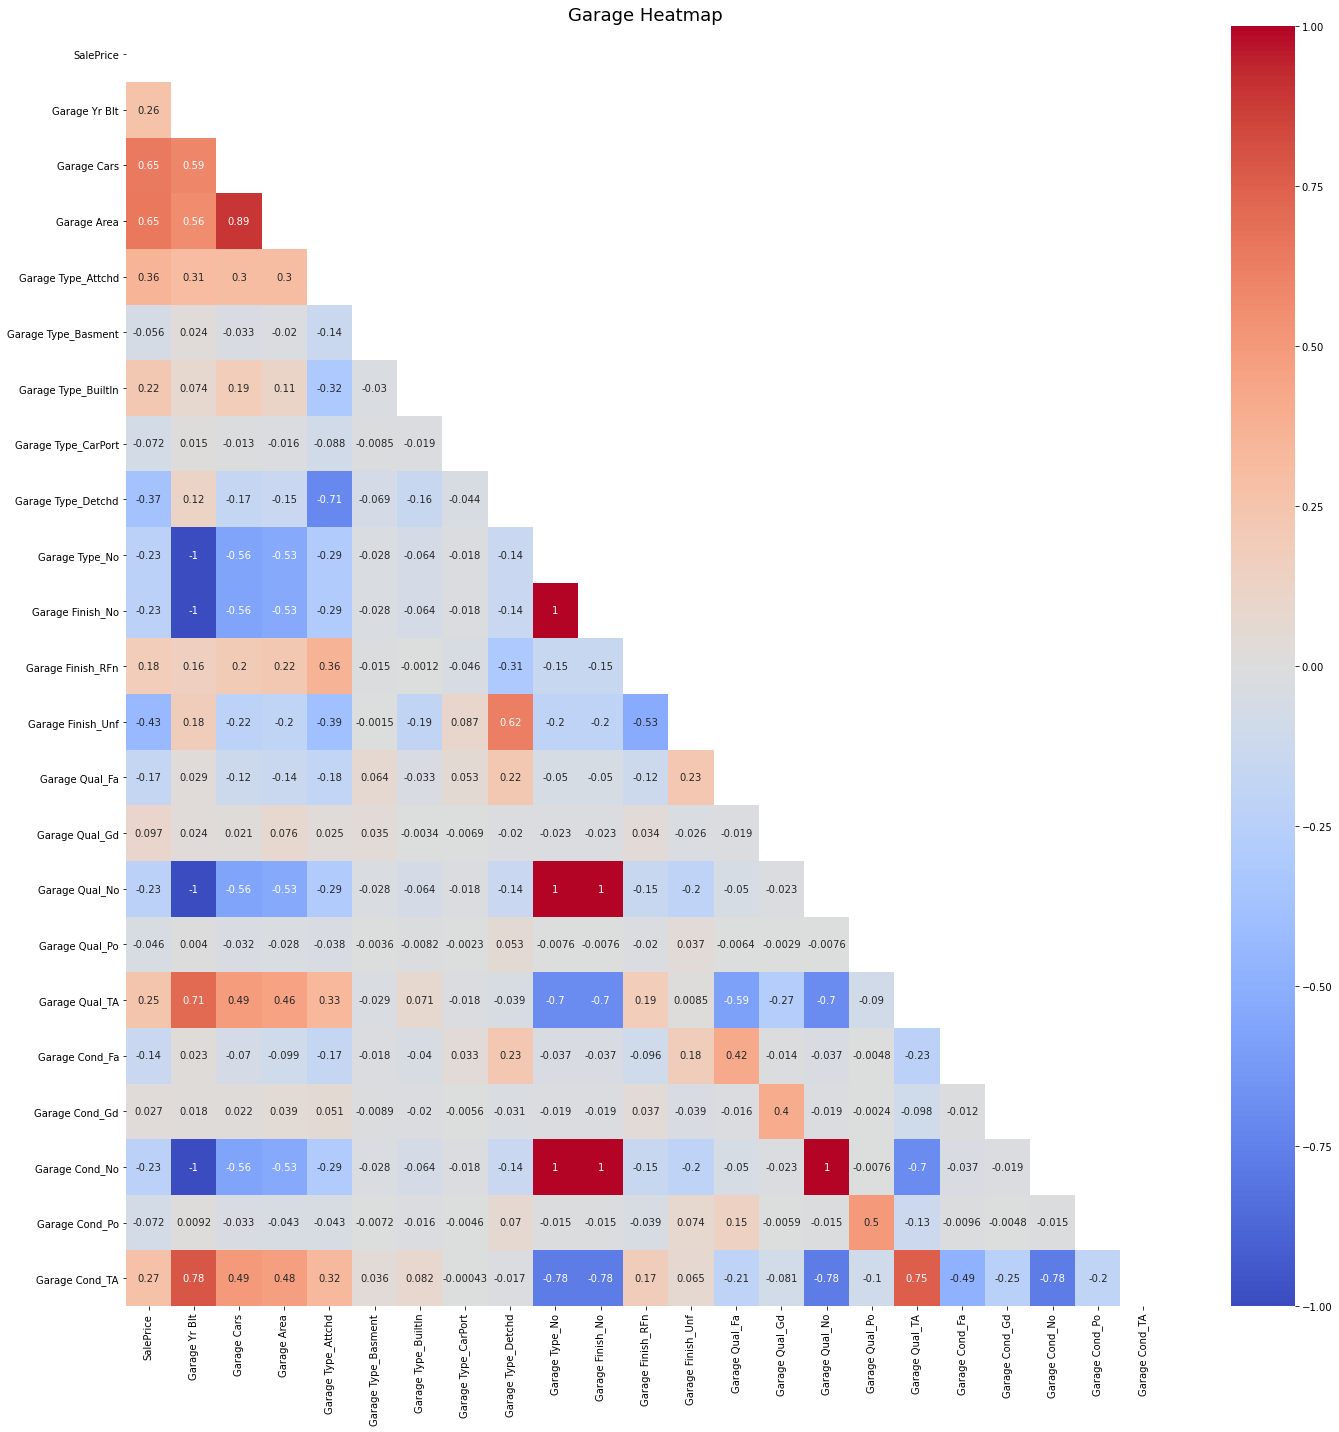

In [68]:
heatmap_func(train_garage,"Garage Heatmap",20,20)

In [69]:
train_model["have_garage"] = [5 if cell != "No" else 0 for cell in train_model["Garage Type"]]
train_model["is_garage_fin"] = [5 if cell == "RFn" else 0 for cell in train_model["Garage Finish"]]
train_model["garage_cond_gd"] = [5 if cell == "Ex"
                                    else 4 if cell == "Gd"
                                    else 3 if cell == "TA"
                                    else 2 if cell == "Fa"
                                    else 1 if cell == "Po"
                                    else 0 for cell in train_model["Garage Cond"]]
train_model["garage_areas_cars"] = train_model["Garage Area"] * train_model["Garage Cars"]

train_model.drop(columns = [columns for columns in garage_columns if columns in categorical] + ["Garage Yr Blt",
                                                                                               "Garage Area",
                                                                                               "Garage Cars"], inplace=True)

train_model.head()

Id        PID  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0  109  533352170     72.774648     13517             6             8   
1  544  531379050     43.000000     11492             7             5   
2  153  535304180     68.000000      7922             5             7   
3  318  916386060     73.000000      9802             5             5   
4  255  906425045     82.000000     14235             6             8   

   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  ...  \
0        1976            2005         289.0         533.0  ...   
1        1996            1997         132.0         637.0  ...   
2        1953            2007           0.0         731.0  ...   
3        2006            2007           0.0           0.0  ...   
4        1900            1993           0.0           0.0  ...   

   is_ext_qual_good  is_bst_qual_gd  is_bst_exp_gd  is_bsmt_glq  is_ktch_gd  \
0                 4               3              0            7           4   
1                 4               4              0            7           4   
2                 3               3              0            7           4   
3                 3               4              0            2           3   
4                 3               2              0            2           3   

   is_new  have_garage  is_garage_fin  garage_cond_gd  garage_areas_cars  
0       0            5              5               3              950.0  
1       0            5              5               3             1118.0  
2       0            5              0               3              246.0  
3       0            5              0               3              800.0  
4       0            5              0               3              968.0  

[5 rows x 66 columns]

In [70]:
train_etc = train[["SalePrice",
                  "Pool Area",
                  "Pool QC",
                  "Misc Feature",
                  "Misc Val"]]

train_etc = pd.get_dummies(train_etc, columns = ["Pool QC","Misc Feature"], 
                            drop_first = True)

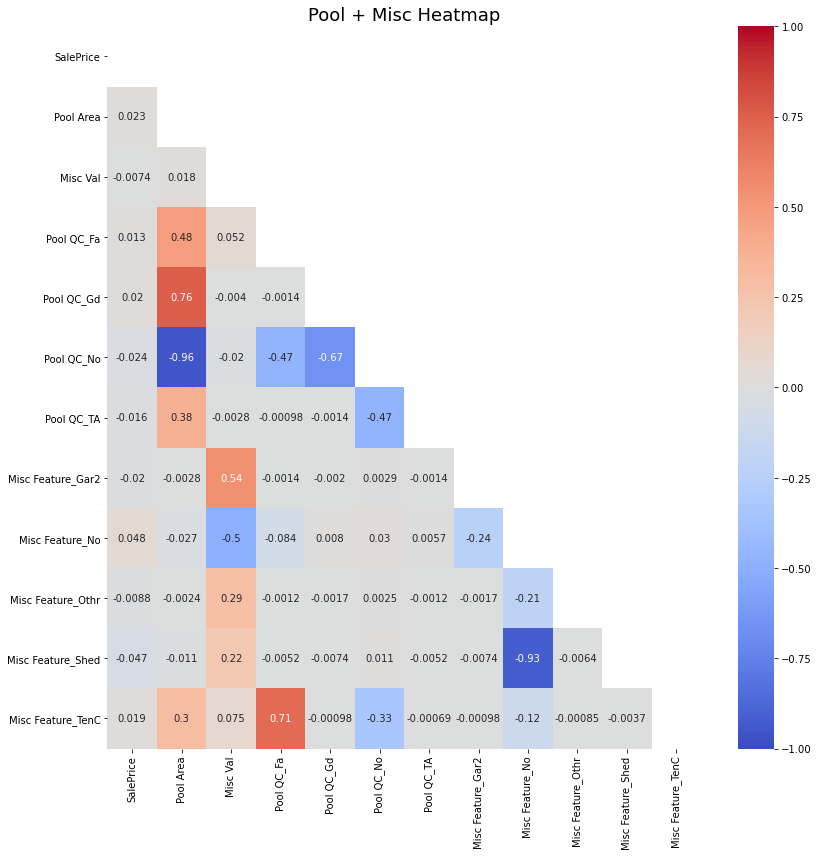

In [71]:
heatmap_func(train_etc,"Pool + Misc Heatmap",12,12)

In [72]:
train_model.drop(columns = ["Pool Area",
                  "Pool QC",
                  "Misc Feature",
                  "Misc Val"], inplace=True)

train_model.head()

Id        PID  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
0  109  533352170     72.774648     13517             6             8   
1  544  531379050     43.000000     11492             7             5   
2  153  535304180     68.000000      7922             5             7   
3  318  916386060     73.000000      9802             5             5   
4  255  906425045     82.000000     14235             6             8   

   Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  ...  \
0        1976            2005         289.0         533.0  ...   
1        1996            1997         132.0         637.0  ...   
2        1953            2007           0.0         731.0  ...   
3        2006            2007           0.0           0.0  ...   
4        1900            1993           0.0           0.0  ...   

   is_ext_qual_good  is_bst_qual_gd  is_bst_exp_gd  is_bsmt_glq  is_ktch_gd  \
0                 4               3              0            7           4   
1                 4               4              0            7           4   
2                 3               3              0            7           4   
3                 3               4              0            2           3   
4                 3               2              0            2           3   

   is_new  have_garage  is_garage_fin  garage_cond_gd  garage_areas_cars  
0       0            5              5               3              950.0  
1       0            5              5               3             1118.0  
2       0            5              0               3              246.0  
3       0            5              0               3              800.0  
4       0            5              0               3              968.0  

[5 rows x 62 columns]

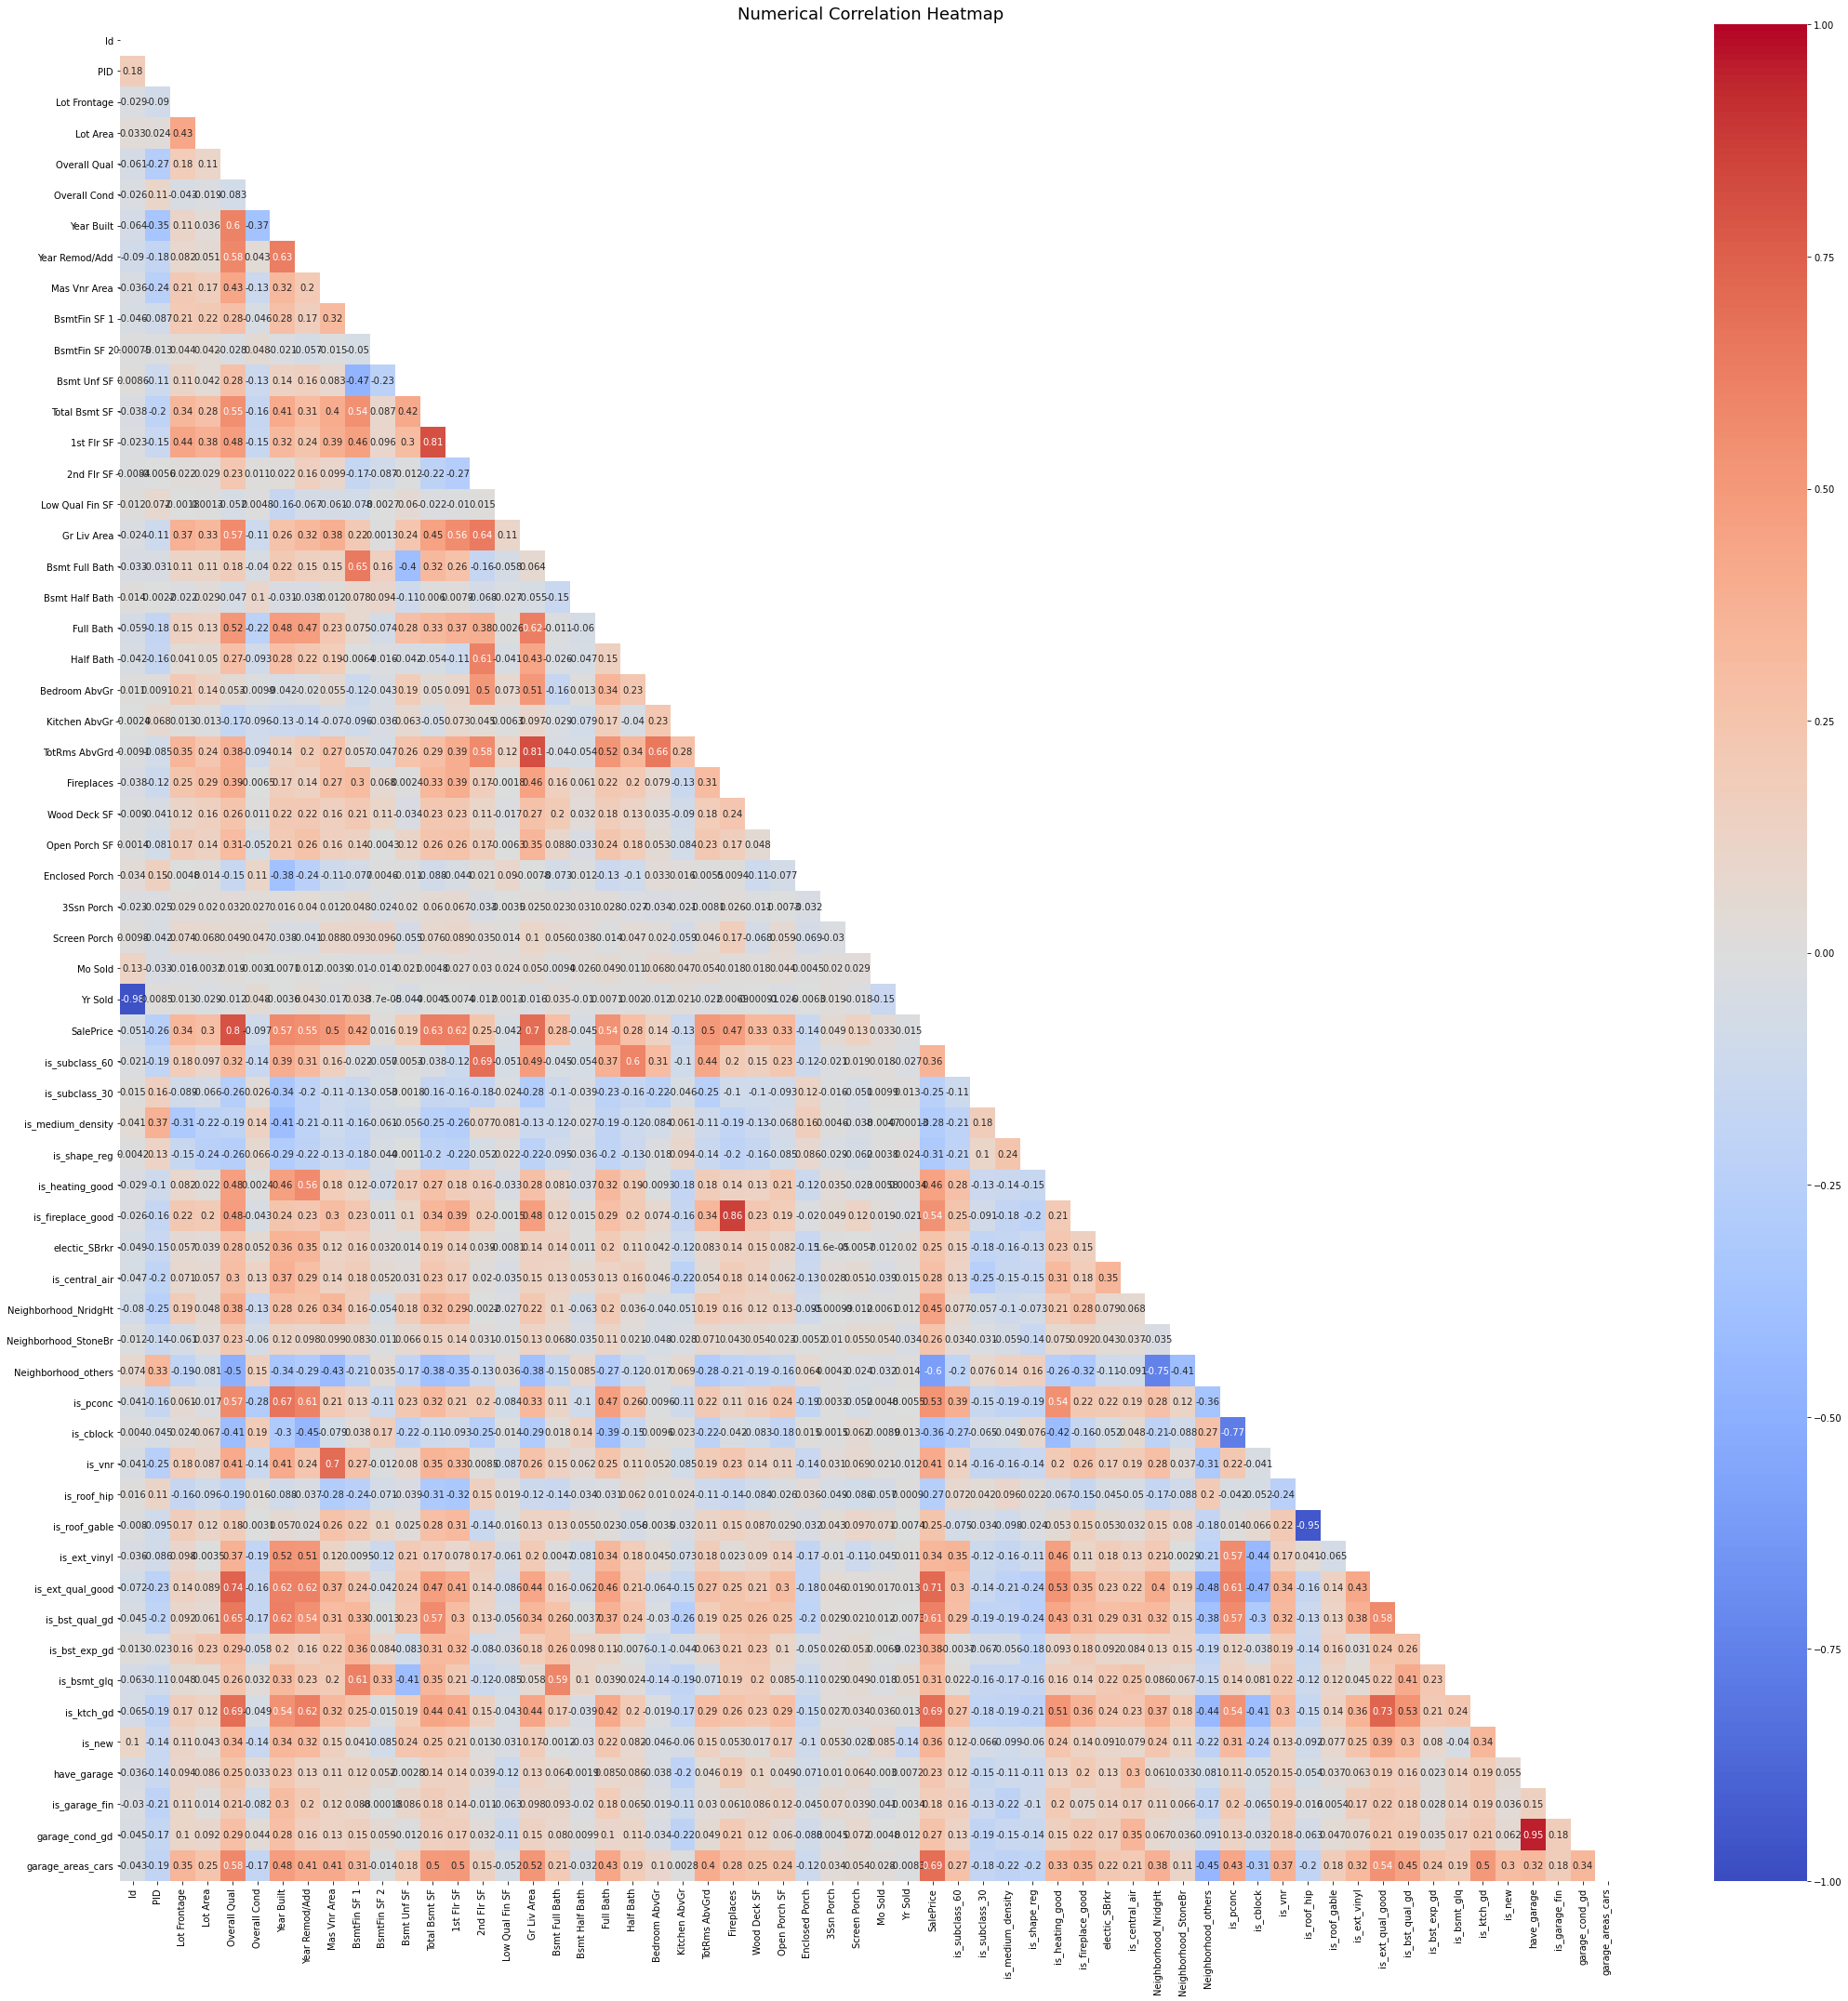

In [73]:
heatmap_func(train_model,"Numerical Correlation Heatmap",30,30)

In [74]:
train_model["total_sf"] = train_model["Total Bsmt SF"] + train_model["1st Flr SF"] + train_model["2nd Flr SF"]

train_model.drop(columns=["Total Bsmt SF",
                "1st Flr SF",
                "2nd Flr SF"], inplace = True)

In [75]:
corr_model = train_model.corr()
corr_model["SalePrice"].sort_values(ascending = False)

SalePrice               1.000000
Overall Qual            0.800207
total_sf                0.783108
is_ext_qual_good        0.712146
Gr Liv Area             0.697038
is_ktch_gd              0.692336
garage_areas_cars       0.690596
is_bst_qual_gd          0.612188
Year Built              0.571849
Year Remod/Add          0.550370
is_fireplace_good       0.538925
Full Bath               0.537969
is_pconc                0.529047
TotRms AbvGrd           0.504014
Mas Vnr Area            0.503579
Fireplaces              0.471093
is_heating_good         0.458354
Neighborhood_NridgHt    0.448647
BsmtFin SF 1            0.423856
is_vnr                  0.411170
is_bst_exp_gd           0.377032
is_new                  0.358102
is_subclass_60          0.356274
is_ext_vinyl            0.341777
Lot Frontage            0.336882
Open Porch SF           0.333476
Wood Deck SF            0.326490
is_bsmt_glq             0.313746
Lot Area                0.296566
Bsmt Full Bath          0.283332
Half Bath 

In [76]:
high_corr = pd.DataFrame(corr_model[(corr_model["SalePrice"] >= 0.25) | (corr_model["SalePrice"] <= -0.25)]["SalePrice"])

In [77]:
high_columns = list(column for column in high_corr.index if column != "SalePrice")
low_corr = [columns for columns in train_model.columns if columns not in high_columns and columns != "SalePrice"]

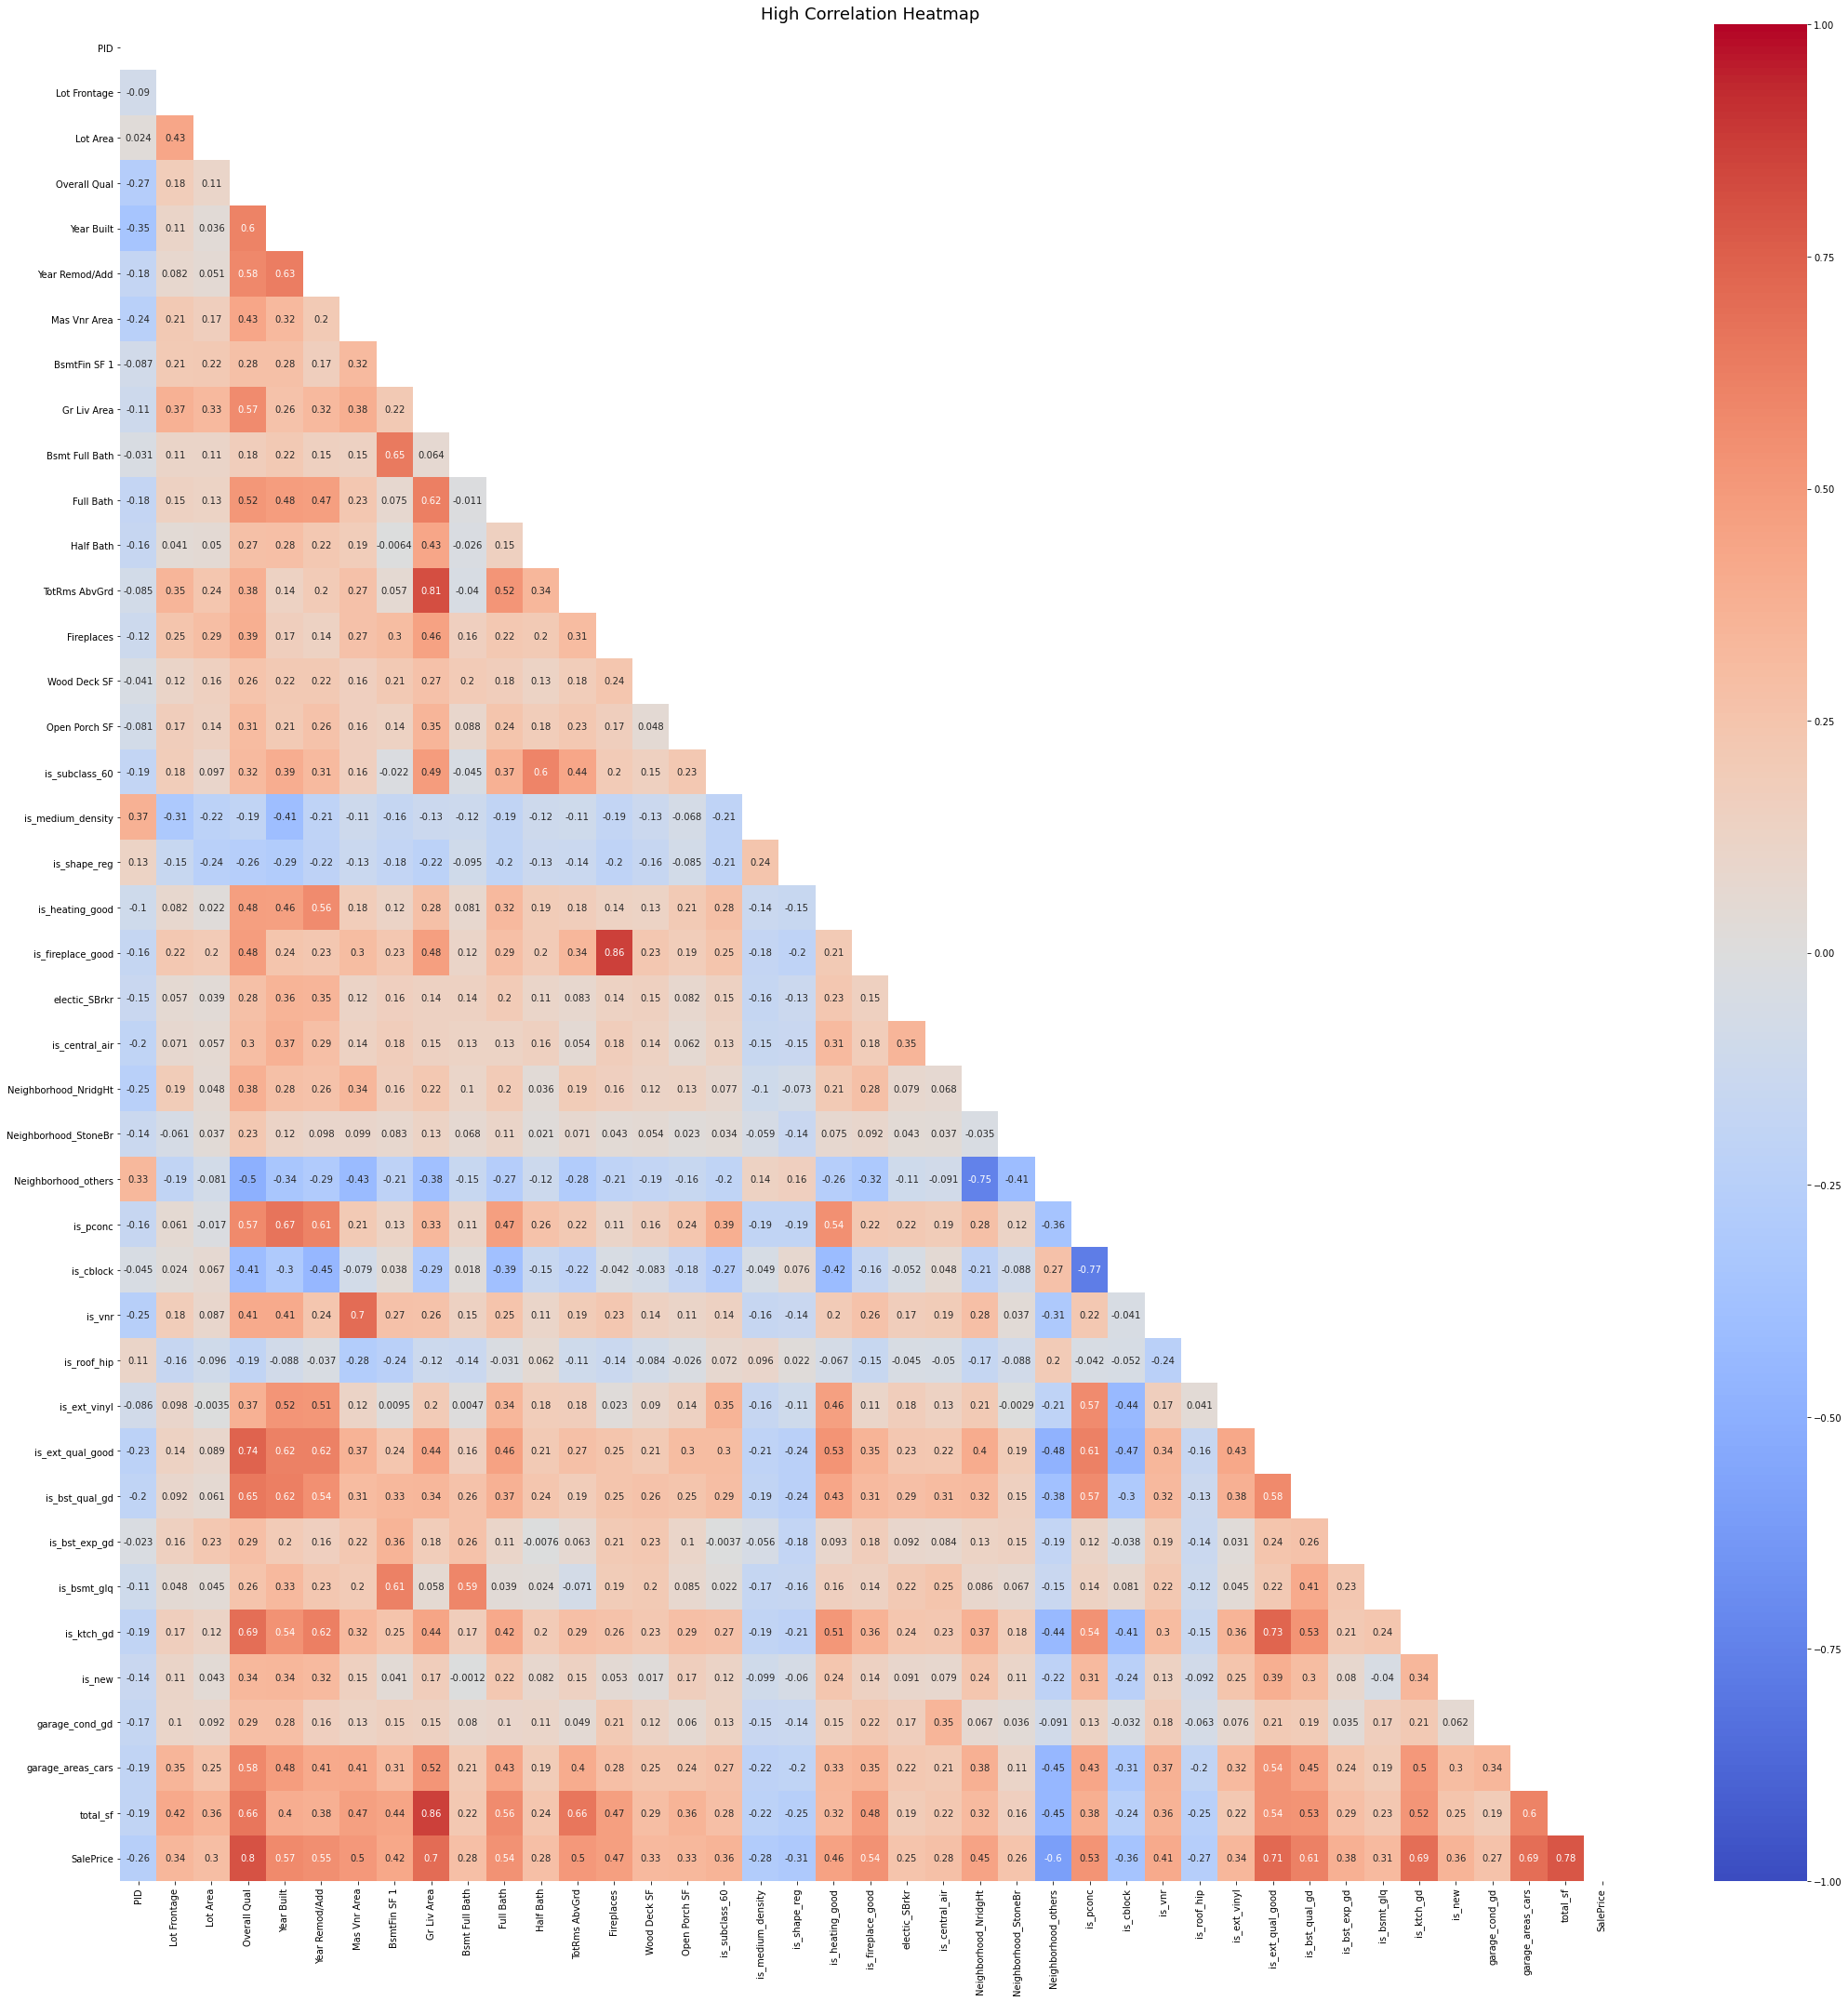

In [78]:
train_fin_df = train_model[high_columns +["SalePrice"]]
heatmap_func(train_fin_df,"High Correlation Heatmap",30,30)

After dropping columns with low correlation to price and numifying categorical columns, it can be observed above that the Year Built column and Year Remod/Add have a similar relationship with price and high multicoliniearity. After referring to the dictionary, and due to reasons of multicoliniearity, the year built column is dropped. 

In [79]:
train_fin_df.drop(columns = ["Year Built"],inplace = True)

/Users/akhairunnisa/miniforge3/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Dealing with Outliers**

A scatter subplot was created to show the relationship between columns and sale price to be able to spot outliers. After multiple trial-and-errors, outliers within the columns Gr Liv Area, Lot Area and Lot Frontage were removed.

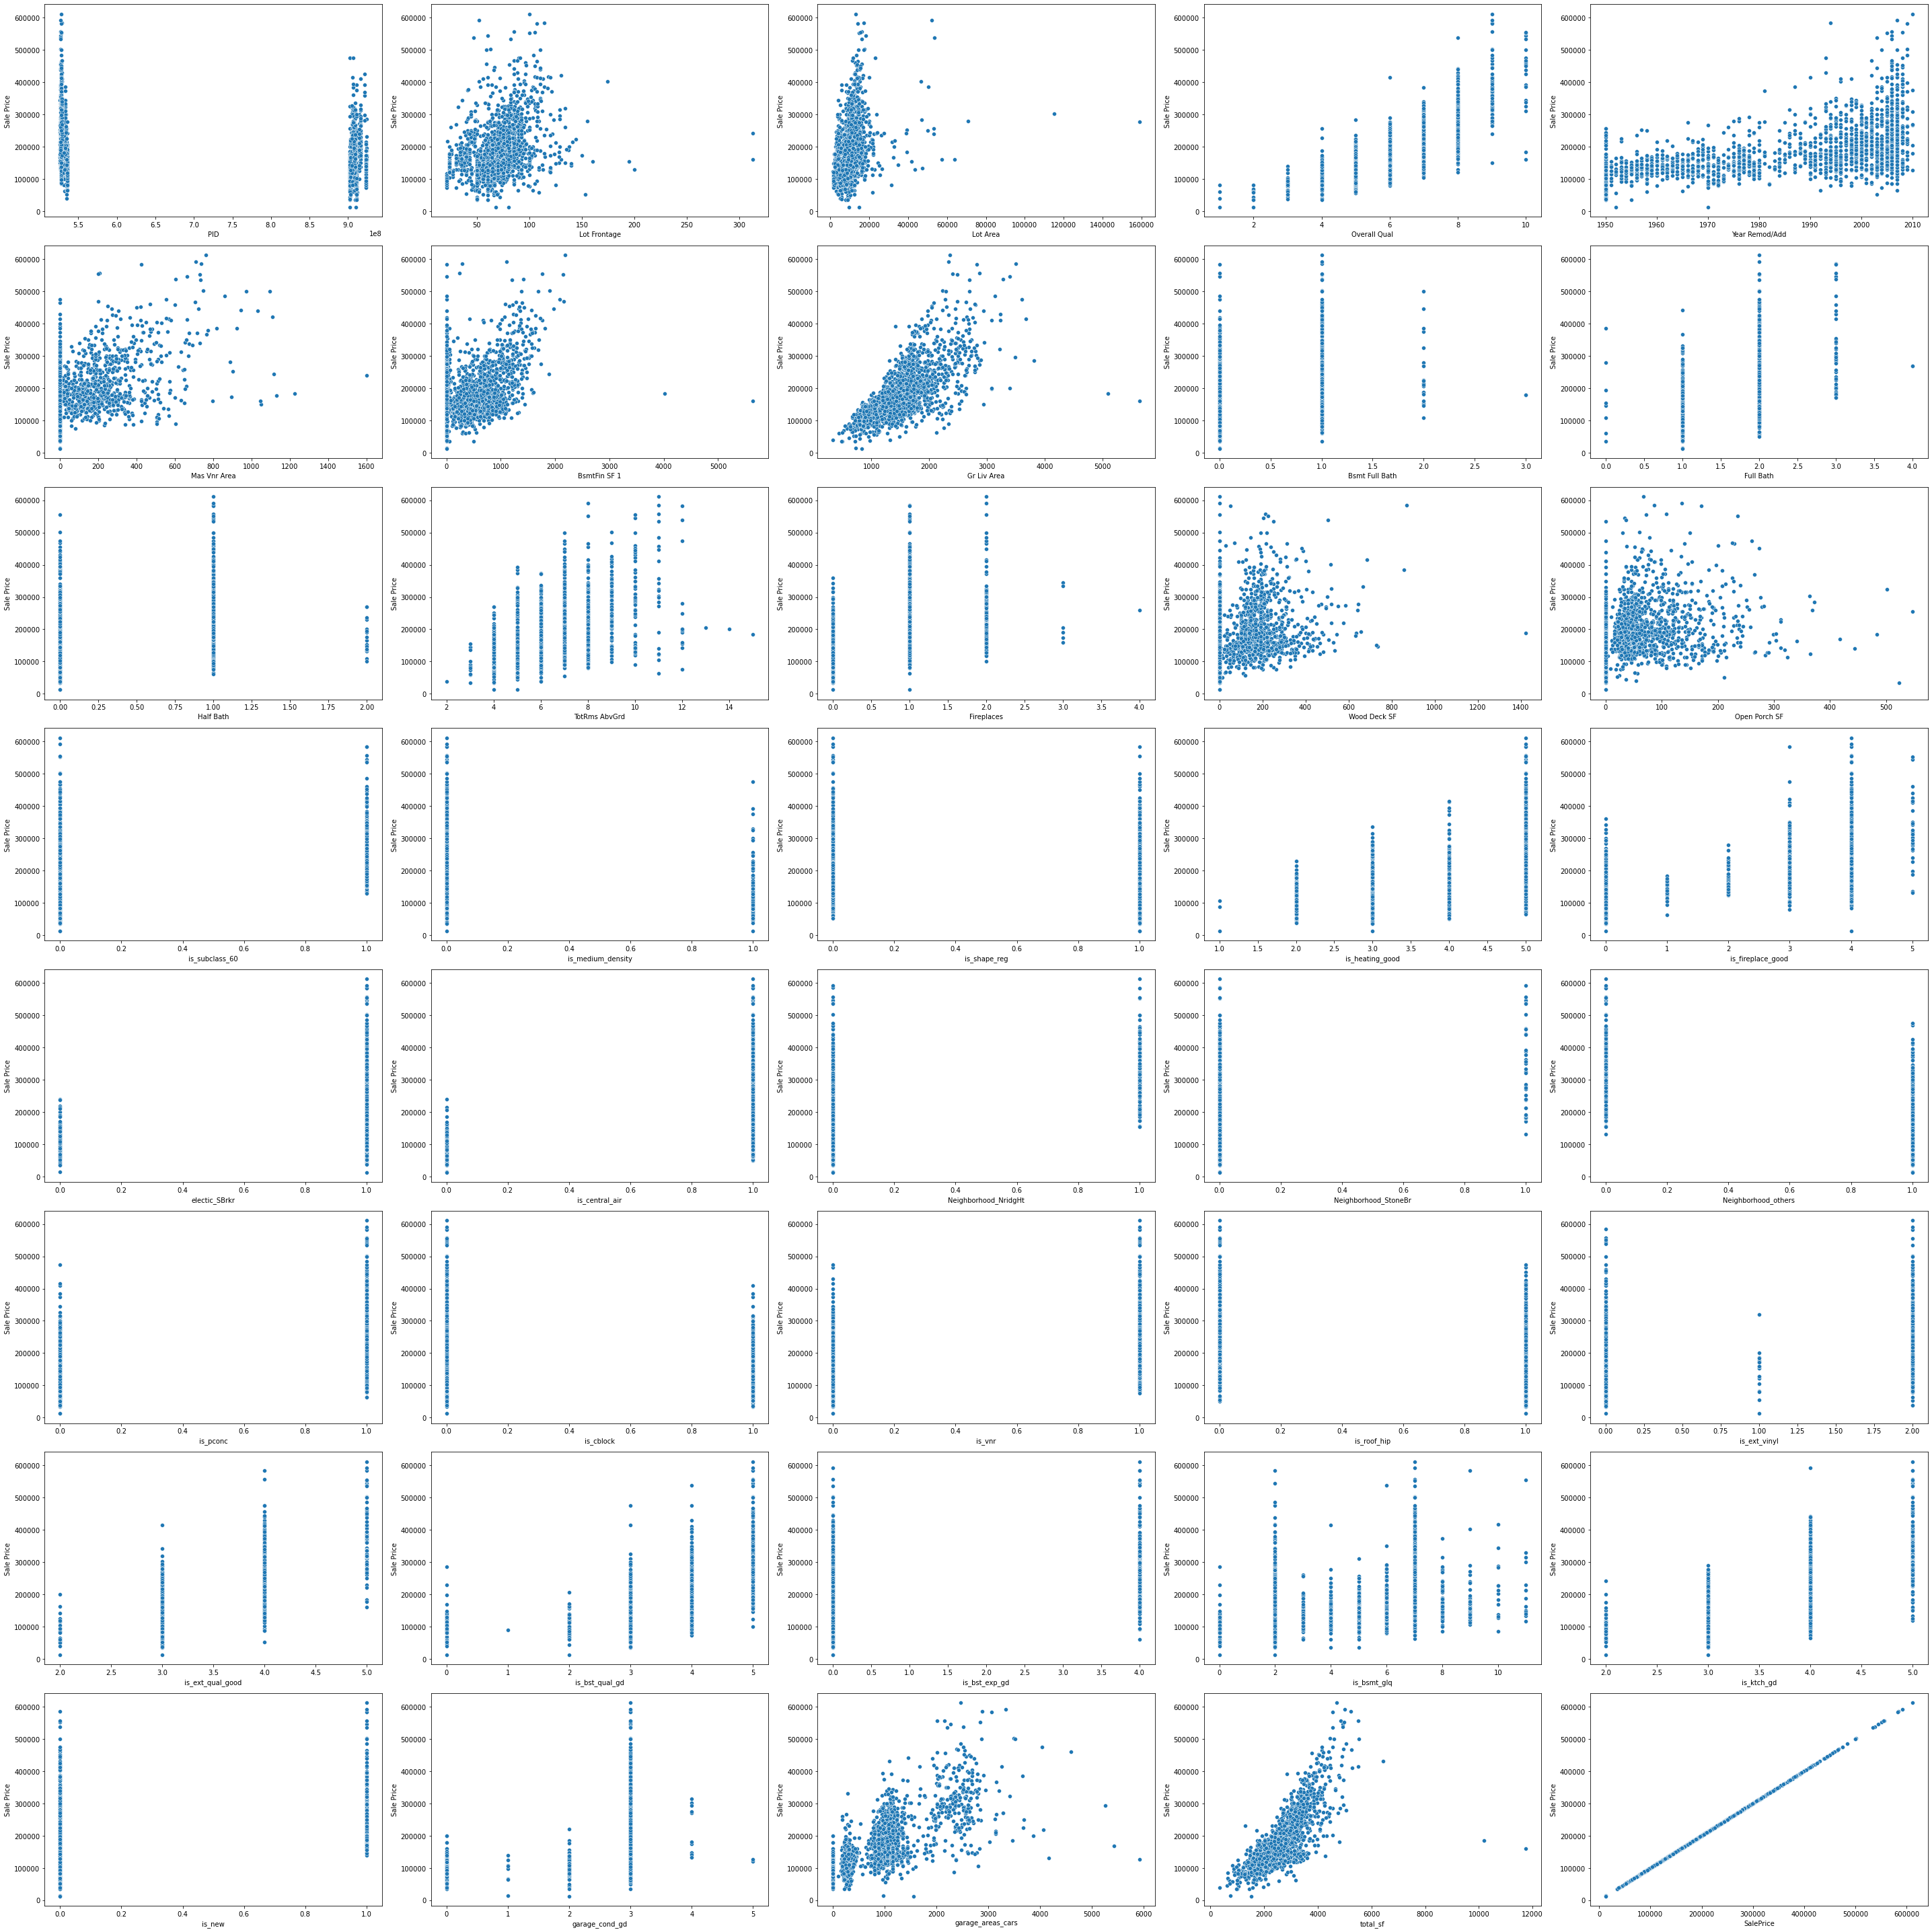

In [80]:
fig, ax = plt.subplots(nrows=8, ncols=5, figsize=(40,40))
fig.subplots_adjust(top=0.88)
ax = ax.ravel()

for i, column in enumerate(train_fin_df.columns):
    if column != "Year Built":
        sns.scatterplot(x=train_fin_df[column], 
                        y=train_fin_df["SalePrice"],
                        ax=ax[i])
        ax[i].set_xlabel(column)
        ax[i].set_ylabel("Sale Price")
        plt.tight_layout();

In [81]:
#thank you Gwen 

train_fin_df = train_fin_df[(train_fin_df["Gr Liv Area"] < 5000)
                             & (train_fin_df["Lot Area"] < 100000)
                             & (train_fin_df["Lot Frontage"] < 300)]

### IV. Modeling

##### Setting up X and y Variables

As mentioned in the above section, Sale Price is normalized to fulfill the model assumptions

In [82]:
X = train_fin_df.drop(columns=["SalePrice"], inplace=False)
y = np.log1p(train_fin_df["SalePrice"])

##### Train-Test Split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2020)

In [84]:
X_train.head()

PID  Lot Frontage  Lot Area  Overall Qual  Year Remod/Add  \
1354  527353020          80.0     10928             6            1986   
1539  905104110          68.0     10265             5            2005   
1141  902401120          75.0     13500            10            2000   
2027  535456010          75.0      8512             5            1960   
1979  528431050         116.0     13501             8            2006   

      Mas Vnr Area  BsmtFin SF 1  Gr Liv Area  Bsmt Full Bath  Full Bath  ...  \
1354         101.0         363.0         1671             0.0          2  ...   
1539           0.0         758.0          992             1.0          1  ...   
1141           0.0           0.0         2775             0.0          3  ...   
2027           0.0           0.0         1556             0.0          2  ...   
1979         208.0          63.0         1636             1.0          2  ...   

      is_ext_vinyl  is_ext_qual_good  is_bst_qual_gd  is_bst_exp_gd  \
1354             2                 3               3              0   
1539             0                 3               3              0   
1141             0                 5               3              0   
2027             0                 3               3              0   
1979             2                 4               4              0   

      is_bsmt_glq  is_ktch_gd  is_new  garage_cond_gd  garage_areas_cars  \
1354            3           3       0               3              968.0   
1539            6           4       0               3              294.0   
1141            2           4       0               3             1760.0   
2027            2           3       0               0                0.0   
1979            7           4       0               3             2595.0   

      total_sf  
1354    3098.0  
1539    1984.0  
1141    4012.0  
2027    3112.0  
1979    3259.0  

[5 rows x 39 columns]

#### a. Baseline Model

The baseline score for the model to beat is RMSE of USD 83.7K.

In [85]:
dummy_model = DummyRegressor()
dummy_model.fit(X_train,y_train)
dummy_r2_score_train = r2_score(y_train, dummy_model.predict(y_train))
dummy_r2_score_test = r2_score(y_test, dummy_model.predict(y_test))
dummy_rmse_train = mean_squared_error(np.expm1(y_train), np.expm1(dummy_model.predict(y_train)), squared=False)
dummy_rmse_test = mean_squared_error(np.expm1(y_test), np.expm1(dummy_model.predict(y_test)), squared=False)
print(f'Train Dummy R2 Score: {dummy_r2_score_train} \nTest Dummy R2 Score: {dummy_r2_score_test} \nTrain Dummy RMSE: {dummy_rmse_train} \nTest Dummy RMSE {dummy_rmse_test}')

Train Dummy R2 Score: 0.0 
Test Dummy R2 Score: -0.000646209108452922 
Train Dummy RMSE: 79647.06962004676 
Test Dummy RMSE 83705.40480757957


#### b. Linear Regression and Cross Validation Score

In [86]:
lr = LinearRegression()
cross_val_score(lr,X_train,y_train)

array([0.91907311, 0.87575012, 0.90945946, 0.83331618, 0.90817421])

In [87]:
lr.fit(X_train, y_train)
lr_r2_score_train = lr.score(X_train,y_train)
lr_r2_score_test = lr.score(X_test,y_test)
lr_rmse_train = mean_squared_error(np.expm1(y_train), np.expm1(lr.predict(X_train)), squared=False)
lr_rmse_test = mean_squared_error(np.expm1(y_test), np.expm1(lr.predict(X_test)), squared=False)
print(f'Train Linear Reg R2 Score: {lr_r2_score_train} \nTest Linear Reg R2 Score: {lr_r2_score_test} \nTrain Linear Reg RMSE: {lr_rmse_train} \nTest Linear Reg RMSE {lr_rmse_test}')

Train Linear Reg R2 Score: 0.8960279630119677 
Test Linear Reg R2 Score: 0.8995863481531847 
Train Linear Reg RMSE: 21165.569568150477 
Test Linear Reg RMSE 22670.881483915306


Looking at the cross validation score of the multiple linear regression model, overall R2 score of the model is quite high, with slight overfits, however when the model is applied to the actual test data, we can see that it is a good fit when looking at both scores for the train and test data. 

RMSE is significantly better than the baseline model, at USD 21.2K and USD 22.7K, respectively.

#### c. Polynomial Features

In [88]:
poly = PolynomialFeatures(include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [89]:
poly_lr = LinearRegression()
poly_lr.fit(X_train_poly, y_train)
poly_r2_score_train = poly_lr.score(X_train_poly,y_train)
poly_r2_score_test = poly_lr.score(X_test_poly,y_test)
poly_rmse_train = mean_squared_error(np.expm1(y_train), np.expm1(poly_lr.predict(X_train_poly)), squared=False)
poly_rmse_test = mean_squared_error(np.expm1(y_test), np.expm1(poly_lr.predict(X_test_poly)), squared=False)
print(f'Train with Polynomial Features R2 Score: {poly_r2_score_train} \nTest with Polynomial Features R2 Score: {poly_r2_score_test} \nTrain with Polynomial Features RMSE: {poly_rmse_train} \nTest with Polynomial Features RMSE {poly_rmse_test}')

Train with Polynomial Features R2 Score: 0.8935057413531291 
Test with Polynomial Features R2 Score: 0.8267724889012915 
Train with Polynomial Features RMSE: 24857.404862178253 
Test with Polynomial Features RMSE 36318.695186995414


The polynomial feature allows for the automized creation of multiple features. Although this does often result with overfitting being that additional features makes a model more complex and therefore break the assumption of no multicoliniearity, inputting polynomialized features into a regularized regression model such as Ridge and Lasso (which neutralizes the effects) may be beneficial towards the predictive nature of the model. As we can see above, R2 score for Train is higher than Test, at 0.89 vs 0.83, with an RSME of USD 24.9K and USD 36.3K, respectively. However, performance is still better when compared to the baseline. 

#### c. Regularized Regression

##### Standard Scaler

To be able to use regularized regression models, we need to scale the data to the point where the distribution mean is 0 and standard deviation is 1. 

In [90]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

#### 1. Ridge

In [91]:
# based on regularized regression class code

r_alphas = np.logspace(0,5,100)
ridge_cv = RidgeCV(alphas=r_alphas,scoring="r2", cv=5)
ridge_cv.fit(Z_train,y_train)
ridge_cv.alpha_

41.32012400115337

In [92]:
ridge_r2_score_train = ridge_cv.score(Z_train,y_train)
ridge_r2_score_test = ridge_cv.score(Z_test,y_test)
ridge_rmse_train = mean_squared_error(np.expm1(y_train), np.expm1(ridge_cv.predict(Z_train)), squared=False)
ridge_rmse_test = mean_squared_error(np.expm1(y_test), np.expm1(ridge_cv.predict(Z_test)), squared=False)
print(f'Train Ridge R2 Score: {ridge_r2_score_train} \nTest Ridge R2 Score: {ridge_r2_score_test} \nTrain Ridge RMSE: {ridge_rmse_train} \nTest Ridge RMSE {ridge_rmse_test}')

Train Ridge R2 Score: 0.8958091051732656 
Test Ridge R2 Score: 0.8995070438688855 
Train Ridge RMSE: 21089.437380480784 
Test Ridge RMSE 22759.001132117293


In terms of fitting the model, R2 score seem to be the same, however looking at the RMSE, we can see that test RMSE is ~USD 1.7K higher, which means the residuals (difference between actual Y and predicted Y) is larger. However, performance remain better than the baseline model.

#### 2. L.A.S.S.O

In [93]:
# based on regularized regression class code

l_alphas = np.logspace(-3,0,100)
lasso_cv = LassoCV(alphas=l_alphas,cv=5)
lasso_cv.fit(Z_train,y_train)
lasso_cv.alpha_

0.002848035868435802

In [94]:
lasso_r2_score_train = lasso_cv.score(Z_train,y_train)
lasso_r2_score_test = lasso_cv.score(Z_test,y_test)
lasso_rmse_train = mean_squared_error(np.expm1(y_train), np.expm1(lasso_cv.predict(Z_train)), squared=False)
lasso_rmse_test = mean_squared_error(np.expm1(y_test), np.expm1(lasso_cv.predict(Z_test)), squared=False)
print(f'Train Lasso R2 Score: {lasso_r2_score_train} \nTest Lasso R2 Score: {lasso_r2_score_test} \nTrain Lasso RMSE: {lasso_rmse_train} \nTest Lasso RMSE {lasso_rmse_test}')

Train Lasso R2 Score: 0.8953246120538909 
Test Lasso R2 Score: 0.8993455994690918 
Train Lasso RMSE: 21253.54025408496 
Test Lasso RMSE 22975.849373512563


Performance of the Lasso Regularized Regression model is slightly worse when compared to Ridge, with RMSEs being slightly higher by 0.8% and 1.0% for Train and Test data respectively. Performance is still significantly better when compared to the baseline model.

##### Adjusted R2

Being that R2 score will always improve as the model is more complex, to be able to analyse if a model is overfit, aside from RMSE, we can adjust R2 by taking into account the number of features used.

In [95]:
dummy_r2_adj_train      = 1 - ((1 - dummy_r2_score_train)*(len(y_train) - 1))/(len(y_train) - X_train.shape[1] - 1)
dummy_r2_adj_test       = 1 - ((1 - dummy_r2_score_test)*(len(y_test) - 1))/(len(y_test) - X_test.shape[1] - 1)
linear_reg_r2_adj_train = 1 - ((1 - lr_r2_score_train)*(len(y_train) - 1))/(len(y_train) - X_train.shape[1] - 1)
linear_reg_r2_adj_test  = 1 - ((1 - lr_r2_score_test)*(len(y_test) - 1))/(len(y_test) - X_test.shape[1] - 1)
poly_r2_adj_train       = 1 - ((1 - poly_r2_score_train)*(len(y_train) - 1))/(len(y_train) - X_train_poly.shape[1] - 1)
poly_r2_adj_test        = 1 - ((1 - poly_r2_score_test)*(len(y_test) - 1))/(len(y_test) - X_test_poly.shape[1] - 1)
ridge_r2_adj_train      = 1 - ((1 - ridge_r2_score_train)*(len(y_train) - 1))/(len(y_train) - Z_train.shape[1] - 1)
ridge_r2_adj_test       = 1 - ((1 - ridge_r2_score_test)*(len(y_test) - 1))/(len(y_test) - Z_test.shape[1] - 1)
lasso_r2_adj_train      = 1 - ((1 - lasso_r2_score_train)*(len(y_train) - 1))/(len(y_train) - Z_train.shape[1] - 1)
lasso_r2_adj_test       = 1 - ((1 - lasso_r2_score_test)*(len(y_test) - 1))/(len(y_test) - Z_test.shape[1] - 1)

In [96]:
metrics_summary_dic = {
    "Metrics":["R2 Train","R2 Test","R2 Adjusted Train","R2 Adjusted Test","RMSE Train","RMSE Test"],
    "Baseline":[dummy_r2_score_train,dummy_r2_score_test,dummy_r2_adj_train,dummy_r2_adj_test,dummy_rmse_train,dummy_rmse_test],
    "Linear Regression":[lr_r2_score_train,lr_r2_score_test,linear_reg_r2_adj_train,linear_reg_r2_adj_test,lr_rmse_train,lr_rmse_test],
    "with Polynomial Features":[poly_r2_score_train,poly_r2_score_test,poly_r2_adj_train,poly_r2_adj_test,poly_rmse_train,poly_rmse_test],
    "Ridge":[ridge_r2_score_train,ridge_r2_score_test,ridge_r2_adj_train,ridge_r2_adj_test,ridge_rmse_train,ridge_rmse_test],
    "Lasso":[lasso_r2_score_train,lasso_r2_score_test,lasso_r2_adj_train,lasso_r2_adj_test,lasso_rmse_train,lasso_rmse_test]
}

In [97]:
metrics_summary = pd.DataFrame(metrics_summary_dic)
metrics_summary.set_index("Metrics", inplace=True)

In [98]:
metrics_summary = round(metrics_summary[metrics_summary.columns],3)

In [99]:
metrics_summary

Baseline  Linear Regression  with Polynomial Features  \
Metrics                                                                     
R2 Train               0.000              0.896                     0.894   
R2 Test               -0.001              0.900                     0.827   
R2 Adjusted Train     -0.026              0.893                     0.771   
R2 Adjusted Test      -0.083              0.891                     1.287   
RMSE Train         79647.070          21165.570                 24857.405   
RMSE Test          83705.405          22670.881                 36318.695   

                       Ridge      Lasso  
Metrics                                  
R2 Train               0.896      0.895  
R2 Test                0.900      0.899  
R2 Adjusted Train      0.893      0.893  
R2 Adjusted Test       0.891      0.891  
RMSE Train         21089.437  21253.540  
RMSE Test          22759.001  22975.849

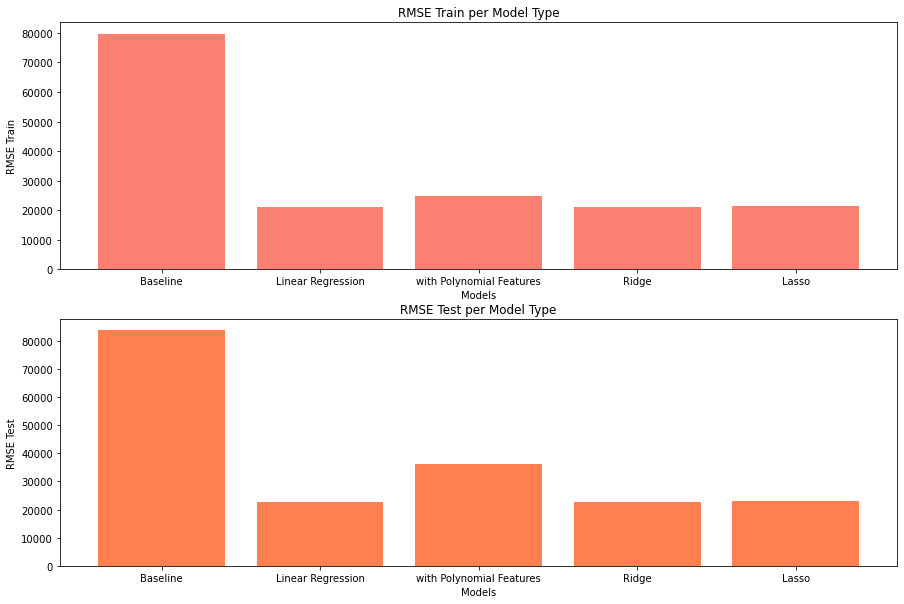

In [100]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10))
ax = ax.ravel()

for i, column in enumerate(["RMSE Train","RMSE Test"]):
    ax[i].bar(x = metrics_summary.T.index, height = metrics_summary.T[column], color=['salmon','coral'][i])
    ax[i].set_title(column + " per Model Type")
    ax[i].set_xlabel("Models")
    ax[i].set_ylabel(column)

Overall, if we were too look at the R2 scores and RMSE, all model performed better than the baseline model (as expected). However when we look at adjusted R2 for the model with polynomial features that have not been regularized, we can see that it is larger than 1, this is due to the fact that when polynomialized there were more features than there were predicted values, which is not a best practice when modeling with linear regression. From this we can observe how Ridge and Lasso's ability to remove features automatically to fulfill the assumption of no multicoliniearity improves the overall performance of the model.

By comparing the three best models (MLR, Ridge and Lasso) with the same R2 adjusted score, we see that non-regularized Multiple Linear Regression have a slightly better performance in RMSE. Not only that, but it's ability to be interpreted is more direct when compared to the other two, which fulfills the client's request for a list of recommendations for users on features they can improve on to be able to increase their house's price.

### V. Conclusion and Recommendation

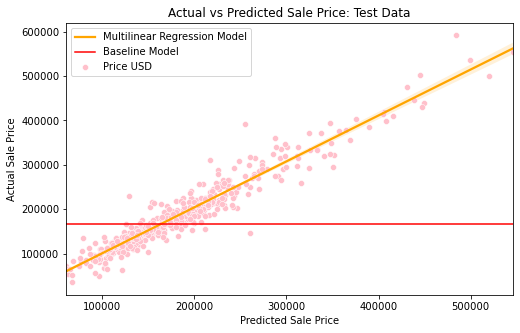

In [101]:
y_preds = lr.predict(X_test)
y_test_actual = np.expm1(y_test)

plt.figure(figsize=(8,5))
sns.regplot(x=np.expm1(y_preds),y=y_test_actual,color="orange",scatter=False,label="Multilinear Regression Model")
sns.scatterplot(x=np.expm1(y_preds),y=y_test_actual,color="pink",label="Price USD")
plt.axhline(np.expm1(dummy_model.predict(y_test)).mean(),color="red",label="Baseline Model")
plt.title("Actual vs Predicted Sale Price: Test Data")
plt.xlabel("Predicted Sale Price")
plt.ylabel("Actual Sale Price")
plt.legend();

For the client's purposes, it is recommended for Company X to use the Multiple Linear Regression model for their pricing mechanism because:

1. Out of all the 5 models (baseline, MLR, LR with Polynomial Features, Ridge and Lasso), it has the best Root Mean Squared Error, which means the difference between predictions and actual sale price is smaller and therefore the model is relatively more accurate
2. It has a high R2 and R2 adjusted score, and similar scores for both train and test which means the model is a relatively good fit in predicting actual sale price
3. Coefficients are easier to interpret and therefore a list of recommendation regarding features that can be improved on so that sellers can get higher prices on their house can be created

Looking at the graph above, we can see that the model is predicting relatively well for houses below ~USD 450K. To improve the model, it may be beneficial to have more training data on houses with higher prices.

In [102]:
# Thanks Caleb for coefficient calculation interpretation documentation: https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/
coef = pd.DataFrame({x:round(y,2) for x,y in zip(X.columns,(np.expm1(lr.coef_) * 100))},index=["% Coefficient with Sale Price"]).T.sort_values("% Coefficient with Sale Price",ascending=True)

In [103]:
coef

% Coefficient with Sale Price
is_medium_density                             -6.56
is_shape_reg                                  -1.40
is_vnr                                        -1.00
Neighborhood_others                           -0.92
is_roof_hip                                   -0.69
Half Bath                                     -0.50
is_subclass_60                                -0.46
is_ext_vinyl                                  -0.26
PID                                            0.00
Lot Area                                       0.00
Mas Vnr Area                                   0.00
garage_areas_cars                              0.00
Open Porch SF                                  0.00
total_sf                                       0.01
Gr Liv Area                                    0.01
Wood Deck SF                                   0.01
BsmtFin SF 1                                   0.01
Lot Frontage                                   0.09
Year Remod/Add                                 0.15
Full Bath                                      0.47
electic_SBrkr                                  0.53
TotRms AbvGrd                                  0.59
is_bsmt_glq                                    0.67
is_fireplace_good                              0.72
is_ext_qual_good                               1.15
Fireplaces                                     1.44
is_bst_exp_gd                                  1.56
Neighborhood_NridgHt                           1.63
Bsmt Full Bath                                 1.65
is_bst_qual_gd                                 1.83
Neighborhood_StoneBr                           1.85
is_heating_good                                2.05
is_cblock                                      2.47
is_ktch_gd                                     3.18
garage_cond_gd                                 4.98
is_pconc                                       5.67
is_new                                         5.87
Overall Qual                                   8.29
is_central_air                                12.43

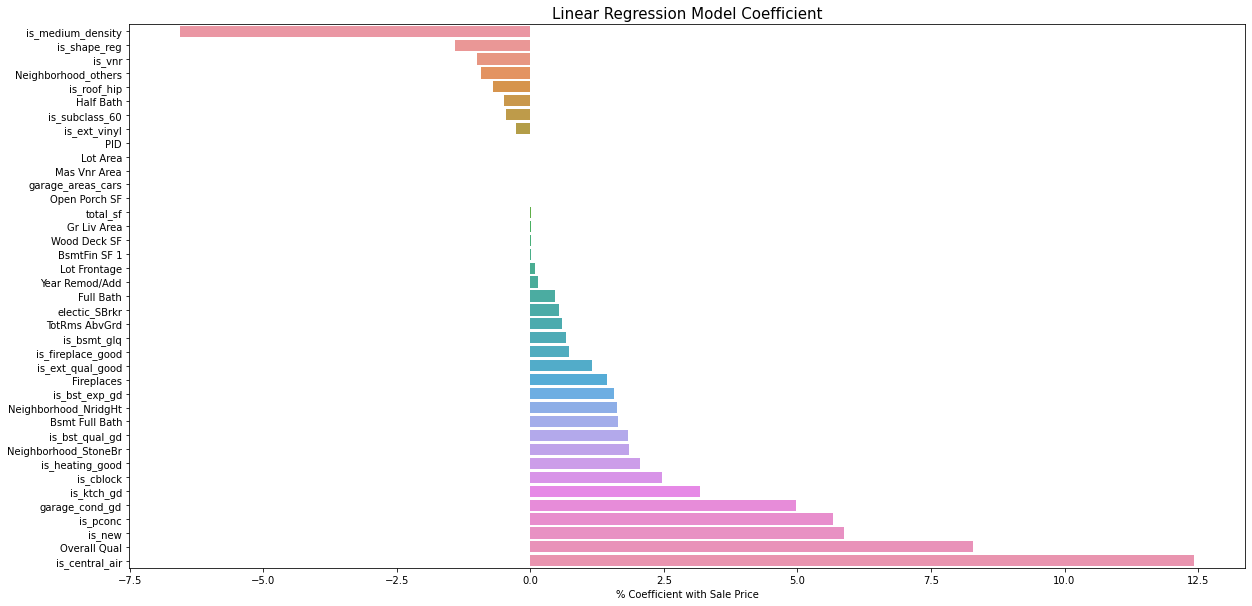

In [104]:
plt.figure(figsize=(20,10))

sns.barplot(x=coef["% Coefficient with Sale Price"],y=coef.index)
plt.title("Linear Regression Model Coefficient", size=15);

Based on the coefficient interpretations, we can make the following recommendation of improvements to sellers who want to sell their houses at a higher price:

1. Add central air conditioning: for every 1-unit increase of central air conditioning, house sale price may increase by 12.4%, ceteris paribus.


2. Improve overall house quality: a 1-unit improvement in the overall quality of the house can result in an 8.3% increase in price, ceteris paribus. Looking at the heatmap in the EDA section we can see that the following features are highly correlated to overall house quality:
- Kitchen quality
- Garage capacity and quality
- Exterior look
- Fireplace / heating
- Foundation (particularly houses with concrete block foundation)


3. If your house is new, price may be 5.9% higher in comparison to older counterparts, ceteris paribus.

### VI. Appendix I: Kaggle Submission

In [105]:
# read in the test dataset

test = pd.read_csv("../datasets/test.csv")
test.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0     NaN   
1   NaN       IR1          Lvl  ...          0            0         0     NaN   
2   NaN       IR1          Lvl  ...          0            0         0     NaN   
3   NaN       Reg          Lvl  ...          0            0         0     NaN   
4   NaN       IR1          Lvl  ...          0          185         0     NaN   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0   NaN          NaN        0       4     2006        WD   
1   NaN          NaN        0       8     2006        WD   
2   NaN          NaN        0       9     2006        New  
3   NaN          NaN        0       7     2007        WD   
4   NaN          NaN        0       7     2009        WD   

[5 rows x 80 columns]

In [106]:
test_id = test["Id"]

In [107]:
test_nulls = test[[columns for columns in test.columns if test[columns].isnull().sum() >= 1]]

In [108]:
test_nulls.isnull().sum() 

Lot Frontage      160
Alley             820
Mas Vnr Type        1
Mas Vnr Area        1
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Electrical          1
Fireplace Qu      422
Garage Type        44
Garage Yr Blt      45
Garage Finish      45
Garage Qual        45
Garage Cond        45
Pool QC           874
Fence             706
Misc Feature      837
dtype: int64

In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [110]:
test[test["Electrical"].isna()]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
634  1578  916386080           80        RL          73.0      9735   Pave   

    Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area  \
634   NaN       Reg          Lvl  ...          0            0         0   

    Pool QC Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
634     NaN   NaN          NaN        0       5     2008        WD   

[1 rows x 80 columns]

In [111]:
test["Electrical"][test["MS SubClass"] == 80].value_counts()

SBrkr    30
FuseA     1
Name: Electrical, dtype: int64

In [112]:
garage_columns = [columns for columns in test.columns if "Garage" in columns]
test[(test["Garage Type"].isna() == False) & (test["Garage Yr Blt"].isna())]

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
764  1357  903426160           60        RM          57.0      8094   Pave   

    Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area  \
764  Grvl       Reg          Lvl  ...          0            0         0   

    Pool QC  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
764     NaN  MnPrv         Shed     1000       9     2008        WD   

[1 rows x 80 columns]

In [113]:
test[garage_columns +["Year Built","Year Remod/Add"]][(test["MS SubClass"] == 60) & (test["Garage Type"] == "Detchd")]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
207      Detchd         1962.0           Unf            1          280   
217      Detchd         1947.0           Unf            1          240   
328      Detchd         1950.0           Fin            1          299   
512      Detchd         1969.0           Unf            2          484   
546      Detchd         1998.0           RFn            2          583   
764      Detchd            NaN           NaN            1          360   

    Garage Qual Garage Cond  Year Built  Year Remod/Add  
207          TA          TA        1962            2001  
217          TA          TA        1946            1992  
328          TA          TA        1950            2005  
512          TA          TA        1969            1969  
546          TA          TA        1998            1998  
764         NaN         NaN        1910            1983

In [114]:
test[garage_columns +["Year Built","Year Remod/Add"]][(test["MS SubClass"] == 70) & (test["Garage Type"] == "Detchd")]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
14       Detchd         1943.0           Unf            1          240   
27       Detchd         1937.0           Unf            1          240   
32       Detchd         1950.0           Unf            4          864   
51       Detchd         2003.0           Unf            2          624   
82       Detchd         2004.0           Unf            1          336   
95       Detchd         1927.0           Unf            1          374   
146      Detchd         1930.0           Unf            2          576   
148      Detchd         1920.0           Unf            1          216   
261      Detchd         1952.0           Unf            1          308   
272      Detchd         1989.0           Unf            2          576   
281      Detchd         1934.0           Unf            1          400   
286      Detchd         1932.0           Unf            2          360   
303      Detchd         1960.0           Unf            2          576   
335      Detchd         1920.0           Unf            1          216   
356      Detchd         1950.0           Unf            3          640   
372      Detchd         1940.0           Unf            2          520   
387      Detchd         1925.0           Unf            1          180   
423      Detchd         1926.0           Unf            1          200   
446      Detchd         1920.0           Unf            2          400   
492      Detchd         1950.0           Unf            1          408   
506      Detchd         1932.0           Unf            2          440   
522      Detchd         1900.0           Unf            1          288   
569      Detchd         1918.0           Unf            1          215   
639      Detchd         1983.0           Unf            2          686   
655      Detchd         1974.0           Unf            2          528   
782      Detchd         1920.0           Unf            1          189   
808      Detchd         2001.0           Unf            1          369   

    Garage Qual Garage Cond  Year Built  Year Remod/Add  
14           Fa          TA        1924            1996  
27           Fa          Po        1880            1991  
32           TA          TA        1880            2003  
51           TA          TA        1890            2002  
82           TA          TA        1930            2005  
95           TA          TA        1927            1950  
146          Fa          Fa        1915            1950  
148          Fa          Fa        1920            1950  
261          TA          TA        1952            1952  
272          TA          TA        1920            1950  
281          TA          TA        1925            1950  
286          TA          TA        1932            1950  
303          TA          TA        1923            1950  
335          Fa          TA        1920            1950  
356          TA          TA        1910            2002  
372          TA          TA        1919            1950  
387          TA          TA        1925            1997  
423          Fa          TA        1900            2000  
446          Fa          Po        1920            1950  
492          TA          TA        1918            1995  
506          TA          TA        1932            1994  
522          TA          Fa        1900            1950  
569          Fa          TA        1918            1990  
639          Gd          TA        1904            2002  
655          TA          TA        1915            1950  
782          Fa          Fa        1920            1950  
808          TA          TA        1926            1950

In [115]:
test["Garage Qual"][(test["MS SubClass"] == 70) & (test["Garage Type"] == "Detchd") & (test["Garage Area"].between(300,400))].value_counts()

TA    6
Fa    1
Name: Garage Qual, dtype: int64

In [116]:
test[garage_columns][test["Garage Qual"].isna()]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
29          NaN            NaN           NaN            0            0   
45          NaN            NaN           NaN            0            0   
66          NaN            NaN           NaN            0            0   
68          NaN            NaN           NaN            0            0   
105         NaN            NaN           NaN            0            0   
109         NaN            NaN           NaN            0            0   
113         NaN            NaN           NaN            0            0   
144         NaN            NaN           NaN            0            0   
152         NaN            NaN           NaN            0            0   
156         NaN            NaN           NaN            0            0   
180         NaN            NaN           NaN            0            0   
218         NaN            NaN           NaN            0            0   
230         NaN            NaN           NaN            0            0   
231         NaN            NaN           NaN            0            0   
256         NaN            NaN           NaN            0            0   
282         NaN            NaN           NaN            0            0   
305         NaN            NaN           NaN            0            0   
314         NaN            NaN           NaN            0            0   
320         NaN            NaN           NaN            0            0   
337         NaN            NaN           NaN            0            0   
341         NaN            NaN           NaN            0            0   
350         NaN            NaN           NaN            0            0   
359         NaN            NaN           NaN            0            0   
395         NaN            NaN           NaN            0            0   
482         NaN            NaN           NaN            0            0   
496         NaN            NaN           NaN            0            0   
527         NaN            NaN           NaN            0            0   
529         NaN            NaN           NaN            0            0   
536         NaN            NaN           NaN            0            0   
555         NaN            NaN           NaN            0            0   
566         NaN            NaN           NaN            0            0   
591         NaN            NaN           NaN            0            0   
596         NaN            NaN           NaN            0            0   
610         NaN            NaN           NaN            0            0   
615         NaN            NaN           NaN            0            0   
618         NaN            NaN           NaN            0            0   
629         NaN            NaN           NaN            0            0   
674         NaN            NaN           NaN            0            0   
698         NaN            NaN           NaN            0            0   
711         NaN            NaN           NaN            0            0   
764      Detchd            NaN           NaN            1          360   
779         NaN            NaN           NaN            0            0   
803         NaN            NaN           NaN            0            0   
813         NaN            NaN           NaN            0            0   
859         NaN            NaN           NaN            0            0   

    Garage Qual Garage Cond  
29          NaN         NaN  
45          NaN         NaN  
66          NaN         NaN  
68          NaN         NaN  
105         NaN         NaN  
109         NaN         NaN  
113         NaN         NaN  
144         NaN         NaN  
152         NaN         NaN  
156         NaN         NaN  
180         NaN         NaN  
218         NaN         NaN  
230         NaN         NaN  
231         NaN         NaN  
256         NaN         NaN  
282         NaN         NaN  
305         NaN         NaN  
314         NaN         NaN  
320         NaN         NaN  

In [117]:
# test[[columns for columns in test.columns if "Fireplace" in columns]][(test["Fireplace Qu"].isna()) & (test["Fireplaces"] > 0)]
# test[[columns for columns in test.columns if "Pool" in columns]][(test["Pool QC"].isna()) & (test["Pool Area"] > 0)]
test[[columns for columns in test.columns if "Misc" in columns]][(test["Misc Feature"].isna()) & (test["Misc Val"] > 0)].sort_values("Misc Val", ascending = False).head()

Empty DataFrame
Columns: [Misc Feature, Misc Val]
Index: []

In [118]:
# function created to clean dataset similar to how train dataset was cleaned based on issues above

def test_clean_up(dataframe):
    dataframe["Lot Frontage"] = train.groupby("Neighborhood")["Lot Frontage"].apply(lambda x: x.fillna(x.mean()))
    dataframe["Lot Frontage"] = dataframe["Lot Frontage"].fillna(train["Lot Frontage"].mean())
    dataframe["Lot Frontage"] = dataframe["Lot Frontage"].astype(float)
    dataframe["Alley"].fillna("No", inplace= True)
    dataframe["Mas Vnr Type"].fillna("None", inplace= True)
    dataframe["Mas Vnr Area"].fillna(0, inplace= True)
    bsmt_columns = [columns for columns in dataframe.columns if "Bsmt" in columns]
    bsmt_null_rows = list(dataframe[(dataframe["Bsmt Qual"].isna())].index)
    dataframe.loc[bsmt_null_rows,bsmt_columns] = ["No" if columns in categorical else 0 if columns in numerical else "error" for columns in dataframe[bsmt_columns]]
    fireplace_null_rows = list(dataframe[(dataframe["Fireplace Qu"].isna())].index)
    dataframe.loc[fireplace_null_rows,["Fireplace Qu"]] = ["No"] * len(fireplace_null_rows)
    dataframe["Electrical"].fillna("SBrkr", inplace= True)
    dataframe.loc[[764],["MS SubClass","Garage Yr Blt","Garage Finish","Garage Qual","Garage Cond"]] = [70,
                                                                                                       1983,
                                                                                                       "Unf",
                                                                                                       "TA",
                                                                                                       "TA"]
    garage_columns = [columns for columns in dataframe.columns if "Garage" in columns]
    grg_null_rows = list(dataframe[(dataframe["Garage Type"].isna())].index)
    dataframe.loc[grg_null_rows, garage_columns] = ["No" if columns in categorical else 0 if columns in numerical else "error" for columns in dataframe[garage_columns]]
    dataframe["Pool QC"].fillna("No", inplace= True)
    dataframe["Fence"].fillna("No", inplace= True)
    dataframe["Misc Feature"].fillna("No", inplace= True)
    dataframe.loc[[37,578,261], "MS SubClass"] = [30,70,60]
    return dataframe

In [119]:
test_clean_up(test).head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM     72.774648      9142   Pave   
1  2718  905108090           90        RL     43.000000      9662   Pave   
2  2414  528218130           60        RL     68.000000     17104   Pave   
3  1989  902207150           30        RM     73.000000      8520   Pave   
4   625  535105100           20        RL     82.000000      9500   Pave   

  Alley Lot Shape Land Contour  ... 3Ssn Porch Screen Porch Pool Area Pool QC  \
0  Grvl       Reg          Lvl  ...          0            0         0      No   
1    No       IR1          Lvl  ...          0            0         0      No   
2    No       IR1          Lvl  ...          0            0         0      No   
3    No       Reg          Lvl  ...          0            0         0      No   
4    No       IR1          Lvl  ...          0          185         0      No   

  Fence Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  
0    No           No        0       4     2006        WD   
1    No           No        0       8     2006        WD   
2    No           No        0       9     2006        New  
3    No           No        0       7     2007        WD   
4    No           No        0       7     2009        WD   

[5 rows x 80 columns]

In [120]:
sum(test.isnull().sum())

0

In [121]:
# function to create engineered features generated on train dataset

def x_variables_df(dataframe):
    dataframe["is_subclass_60"] = [1 if cell == "60" else 0 for cell in dataframe["MS SubClass"]]
    dataframe["is_subclass_30"] = [1 if cell == "30" else 0 for cell in dataframe["MS SubClass"]]
    dataframe["is_medium_density"] = [1 if cell == "RM" else 0 for cell in dataframe["MS Zoning"]]
    dataframe["is_shape_reg"] = [1 if cell == "Reg" else 0 for cell in dataframe["Lot Shape"]]
    dataframe["is_heating_good"] = [5 if cell == "Ex"
                                      else 4 if cell == "Gd"
                                      else 3 if cell == "TA"
                                      else 2 if cell == "Fa"
                                      else 1 if cell == "Po"
                                      else 0 for cell in dataframe["Heating QC"]]
    dataframe["is_fireplace_good"] = [5 if cell == "Ex"
                                        else 4 if cell == "Gd"
                                        else 3 if cell == "TA"
                                        else 2 if cell == "Fa"
                                        else 1 if cell == "Po"
                                        else 0 for cell in dataframe["Fireplace Qu"]]
    dataframe["electic_SBrkr"] = [1 if cell == "SBrkr" else 0 for cell in dataframe["Electrical"]]
    dataframe["is_central_air"] = [1 if cell == "Y" else 0 for cell in dataframe["Central Air"]]
    dataframe["Neighborhood"] = [cell if cell in relatively_high_correlated_neighborhood else "others" for cell in dataframe["Neighborhood"]]
    dataframe = pd.get_dummies(dataframe, columns = ["Neighborhood"], drop_first = True)
    dataframe["is_pconc"] = [1 if cell == "PConc" else 0 for cell in dataframe["Foundation"]]
    dataframe["is_cblock"] = [1 if cell == "CBlock" else 0 for cell in dataframe["Foundation"]]
    dataframe["is_vnr"] = [1 if cell != "None" else 0 for cell in dataframe["Mas Vnr Type"]]
    dataframe["is_roof_hip"] = [1 if cell != "Hip" else 0 for cell in dataframe["Roof Style"]]
    dataframe["is_roof_gable"] = [1 if cell != "Gable" else 0 for cell in dataframe["Roof Style"]]
    dataframe["1st_vinyl"] = [1 if cell == "VinylSd" else 0 for cell in dataframe["Exterior 1st"]]
    dataframe["2nd_vinyl"] = [1 if cell == "VinylSd" else 0 for cell in dataframe["Exterior 2nd"]]
    dataframe["is_ext_vinyl"] = dataframe["1st_vinyl"] + dataframe["2nd_vinyl"]
    dataframe["is_ext_qual_good"] = [5 if cell == "Ex"
                                        else 4 if cell == "Gd"
                                        else 3 if cell == "TA"
                                        else 2 if cell == "Fa"
                                        else 1 if cell == "Po"
                                        else 0 for cell in dataframe["Exter Qual"]]
    dataframe["is_bst_qual_gd"] = [5 if cell == "Ex"
                                        else 4 if cell == "Gd"
                                        else 3 if cell == "TA"
                                        else 2 if cell == "Fa"
                                        else 1 if cell == "Po"
                                        else 0 for cell in dataframe["Bsmt Qual"]]
    dataframe["is_bst_exp_gd"] = [5 if cell == "Ex"
                                        else 4 if cell == "Gd"
                                        else 3 if cell == "TA"
                                        else 2 if cell == "Fa"
                                        else 1 if cell == "Po"
                                        else 0 for cell in dataframe["Bsmt Exposure"]]
    dataframe["bsmt_fin_1"] = [6 if cell == "GLQ"
                                 else 5 if cell == "ALQ"
                                        else 4 if cell == "BLQ"
                                        else 3 if cell == "Rec"
                                        else 2 if cell == "LwQ"
                                        else 1 if cell == "Unf"
                                        else 0 for cell in dataframe["BsmtFin Type 1"]]
    dataframe["bsmt_fin_2"] = [6 if cell == "GLQ"
                                 else 5 if cell == "ALQ"
                                        else 4 if cell == "BLQ"
                                        else 3 if cell == "Rec"
                                        else 2 if cell == "LwQ"
                                        else 1 if cell == "Unf"
                                        else 0 for cell in dataframe["BsmtFin Type 2"]]
    dataframe["is_bsmt_glq"] = dataframe["bsmt_fin_1"] + dataframe["bsmt_fin_2"] 
    dataframe["is_ktch_gd"] = [5 if cell == "Ex"
                                        else 4 if cell == "Gd"
                                        else 3 if cell == "TA"
                                        else 2 if cell == "Fa"
                                        else 1 if cell == "Po"
                                        else 0 for cell in dataframe["Kitchen Qual"]]
    dataframe["have_garage"] = [5 if cell != "No" else 0 for cell in dataframe["Garage Type"]]
    dataframe["is_garage_fin"] = [5 if cell == "RFn" else 0 for cell in dataframe["Garage Finish"]]
    dataframe["garage_cond_gd"] = [5 if cell == "Ex"
                                        else 4 if cell == "Gd"
                                        else 3 if cell == "TA"
                                        else 2 if cell == "Fa"
                                        else 1 if cell == "Po"
                                        else 0 for cell in dataframe["Garage Cond"]]
    dataframe["garage_areas_cars"] = dataframe["Garage Area"] * dataframe["Garage Cars"]
    dataframe["total_sf"] = dataframe["Total Bsmt SF"] + dataframe["1st Flr SF"] + dataframe["2nd Flr SF"]
    dataframe["is_new"] = [1 if cell == "New" else 0 for cell in dataframe["Sale Type"]]
    return dataframe[list(X.columns)]

In [122]:
test_modified = x_variables_df(test)
test_modified.columns

Index(['PID', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Year Remod/Add',
       'Mas Vnr Area', 'BsmtFin SF 1', 'Gr Liv Area', 'Bsmt Full Bath',
       'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF',
       'Open Porch SF', 'is_subclass_60', 'is_medium_density', 'is_shape_reg',
       'is_heating_good', 'is_fireplace_good', 'electic_SBrkr',
       'is_central_air', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Neighborhood_others', 'is_pconc', 'is_cblock', 'is_vnr', 'is_roof_hip',
       'is_ext_vinyl', 'is_ext_qual_good', 'is_bst_qual_gd', 'is_bst_exp_gd',
       'is_bsmt_glq', 'is_ktch_gd', 'is_new', 'garage_cond_gd',
       'garage_areas_cars', 'total_sf'],
      dtype='object')

In [123]:
# creating X variable for test data
X_f_test = test_modified[list(test_modified.columns)]

In [124]:
# predicting y from test X value

test_preds = lr.predict(X_f_test)

In [125]:
# creating kaggle submission dictionary which is then turned into dataframe adapted from Gwen's function

kaggle_submission = {
    'Id': test_id,
    'SalePrice': np.expm1(test_preds)
}

kaggle_submission = pd.DataFrame(kaggle_submission)

In [126]:
kaggle_submission.head()

Id      SalePrice
0  2658  108427.922494
1  2718  163802.842394
2  2414  224891.656773
3  1989  113948.375558
4   625  168554.339065

In [127]:
# saving kaggle submission dataframe onto csv

# kaggle_submission.to_csv('../datasets/ak_kaggle_submission_37.csv', index=False)